**To Do: Export heatmaps to EE_Exports**


In [ ]:
import ee
import geemap
import pprint as pp
import matplotlib.pyplot as plt
import datetime
import pandas as pd
import seaborn as sns
from tabulate import tabulate


ee.Authenticate()
ee.Initialize(project='jayathesis0811')

In [ ]:
import os
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
drive_directory = '/content/drive/My Drive/EE_exports'

Mounted at /content/drive


In [ ]:
#Area and Image Collection
KyoHwaSo = ee.Geometry.Polygon([
    [[129.56866545193049, 42.355790869190486], [130.06015394463762, 42.338646446847505], [129.97171501232157, 42.05293561706466], [129.52517089523707, 41.986155785924396]]
])


In [ ]:
#computed UV_Aerosol min
def computeUV_Aerosolmin(img):
    date = ee.Date(img.get('system:time_start'))
    UV_Aerosol = img.select('absorbing_aerosol_index')
    min_UV_Aerosol = UV_Aerosol.reduceRegion(reducer=ee.Reducer.min(), geometry=KyoHwaSo, scale=100)
    return ee.Feature(None, {'date': date.format('YYYY-MM-dd'), 'min_UV_Aerosol': min_UV_Aerosol})

#computed UV_Aerosol mean
def computeUV_AerosolMean(img):
    date = ee.Date(img.get('system:time_start'))
    UV_Aerosol = img.select('absorbing_aerosol_index')
    mean_UV_Aerosol = UV_Aerosol.reduceRegion(reducer=ee.Reducer.mean(), geometry=KyoHwaSo, scale=100)
    return ee.Feature(None, {'date': date.format('YYYY-MM-dd'), 'mean_UV_Aerosol': mean_UV_Aerosol})

#computed UV_Aerosol max
def computeUV_Aerosolmax(img):
    date = ee.Date(img.get('system:time_start'))
    UV_Aerosol = img.select('absorbing_aerosol_index')
    max_UV_Aerosol = UV_Aerosol.reduceRegion(reducer=ee.Reducer.max(), geometry=KyoHwaSo, scale=100)
    return ee.Feature(None, {'date': date.format('YYYY-MM-dd'), 'max_UV_Aerosol': max_UV_Aerosol})


# UV Aerosols

In [ ]:
#UV Aerosols for KyoHwaSo
UV_Aerosol = ee.ImageCollection("COPERNICUS/S5P/NRTI/L3_AER_AI")
UV_Aerosol19to23= UV_Aerosol.filterBounds(KyoHwaSo).filterDate("2019-01-01", "2023-12-31")

UV_Aerosol2019 = UV_Aerosol.filterBounds(KyoHwaSo).filterDate("2019-01-01", "2019-12-31")
UV_Aerosol2020 = UV_Aerosol.filterBounds(KyoHwaSo).filterDate("2020-01-01", "2020-12-31")
UV_Aerosol2021 = UV_Aerosol.filterBounds(KyoHwaSo).filterDate("2021-01-01", "2021-12-31")
UV_Aerosol2022 = UV_Aerosol.filterBounds(KyoHwaSo).filterDate("2022-01-01", "2022-12-31")
UV_Aerosol2023 = UV_Aerosol.filterBounds(KyoHwaSo).filterDate("2023-01-01", "2023-12-31")

In [ ]:
#yearly mean for UV aerosols
mean_UV_Aerosol19 = UV_Aerosol2019.mean().reduceRegion(reducer=ee.Reducer.mean(), geometry=KyoHwaSo, scale=100)
meanUV_Aerosol2019 = mean_UV_Aerosol19.get('absorbing_aerosol_index')
mean_UV_Aerosol20 = UV_Aerosol2020.mean().reduceRegion(reducer=ee.Reducer.mean(), geometry=KyoHwaSo, scale=100)
meanUV_Aerosol2020 = mean_UV_Aerosol20.get('absorbing_aerosol_index')
mean_UV_Aerosol21 = UV_Aerosol2021.mean().reduceRegion(reducer=ee.Reducer.mean(), geometry=KyoHwaSo, scale=100)
meanUV_Aerosol2021 = mean_UV_Aerosol21.get('absorbing_aerosol_index')
mean_UV_Aerosol22 = UV_Aerosol2022.mean().reduceRegion(reducer=ee.Reducer.mean(), geometry=KyoHwaSo, scale=100)
meanUV_Aerosol2022 = mean_UV_Aerosol22.get('absorbing_aerosol_index')
mean_UV_Aerosol23 = UV_Aerosol2023.mean().reduceRegion(reducer=ee.Reducer.mean(), geometry=KyoHwaSo, scale=100)
meanUV_Aerosol2023 = mean_UV_Aerosol23.get('absorbing_aerosol_index')

In [ ]:
#table of yearly means
data = [
    ['2019', meanUV_Aerosol2019.getInfo()],
    ['2020', meanUV_Aerosol2020.getInfo()],
    ['2021', meanUV_Aerosol2021.getInfo()],
    ['2022', meanUV_Aerosol2022.getInfo()],
    ['2023', meanUV_Aerosol2023.getInfo()]
]

print(tabulate(data, headers=['Year', 'Mean UV Aerosol (mol/m2)']))

  Year    Mean UV Aerosol (mol/m2)
------  --------------------------
  2019                   -1.11029
  2020                   -1.26581
  2021                   -0.916816
  2022                   -0.363187
  2023                   -0.344508


In [ ]:
#min - map for year 2019-2023
min_daily_average_UV_Aerosol = UV_Aerosol19to23.map(computeUV_Aerosolmin)

min_results_UV_Aerosol = min_daily_average_UV_Aerosol.aggregate_array('min_UV_Aerosol')
dates_min_UV_Aerosol = min_daily_average_UV_Aerosol.aggregate_array('date')

min_UV_Aerosol_values = min_results_UV_Aerosol.getInfo()
dates_min_UV_Aerosol_list = dates_min_UV_Aerosol.getInfo()

#change to datetime obj
datetime_dates_min_UV_Aerosol = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates_min_UV_Aerosol_list]

#combine dates_min_UV_Aerosol with UV_Aerosol average
min_combined_data_UV_Aerosol = [{'date': date, 'min_UV_Aerosol': min_UV_Aerosol} for date, min_UV_Aerosol in zip(dates_min_UV_Aerosol_list, min_UV_Aerosol_values)]

cNames = ['Year', 'Date', 'Min UV_Aerosol concentration', 'Mean UV_Aerosol Concentration', 'Max UV_Aerosol Concentration', 'Mean Rainfall']

days = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]
numbers = [0,1,2,3,4,5,6]
fulldf_UV_Aerosol = pd.DataFrame(columns=cNames)

for i in range(len(numbers)):
  print(numbers[i])
  print(days[i])
  min_monday_data_UV_Aerosol = [item for item, date in zip(min_combined_data_UV_Aerosol, datetime_dates_min_UV_Aerosol) if date.weekday() == numbers[i]]


#combine data with avg UV_Aerosol
  min_filteredmondata_UV_Aerosol = [item for item in min_monday_data_UV_Aerosol if item['min_UV_Aerosol']['absorbing_aerosol_index'] is not None]

#mean - map for year 2019-2023
  mean_daily_average_UV_Aerosol = UV_Aerosol19to23.map(computeUV_AerosolMean)

  mean_results_UV_Aerosol = mean_daily_average_UV_Aerosol.aggregate_array('mean_UV_Aerosol')
  dates_mean_UV_Aerosol = mean_daily_average_UV_Aerosol.aggregate_array('date')

  mean_UV_Aerosol_values = mean_results_UV_Aerosol.getInfo()
  dates_mean_UV_Aerosol_list = dates_mean_UV_Aerosol.getInfo()
  datetime_dates_mean_UV_Aerosol = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates_mean_UV_Aerosol_list]
  mean_combined_data_UV_Aerosol = [{'date': date, 'mean_UV_Aerosol': mean_UV_Aerosol} for date, mean_UV_Aerosol in zip(dates_mean_UV_Aerosol_list, mean_UV_Aerosol_values)]
  mean_monday_data_UV_Aerosol = [item for item, date in zip(mean_combined_data_UV_Aerosol, datetime_dates_mean_UV_Aerosol) if date.weekday() == numbers[i]]

  mean_filteredmondata_UV_Aerosol = [item for item in mean_monday_data_UV_Aerosol if item['mean_UV_Aerosol']['absorbing_aerosol_index'] is not None]

  #max - map for year 2019-2023
  max_daily_average_UV_Aerosol = UV_Aerosol19to23.map(computeUV_Aerosolmax)

  max_results_UV_Aerosol = max_daily_average_UV_Aerosol.aggregate_array('max_UV_Aerosol')
  dates_max = max_daily_average_UV_Aerosol.aggregate_array('date')

  max_UV_Aerosol_values = max_results_UV_Aerosol.getInfo()
  dates_max_list_UV_Aerosol = dates_max.getInfo()
  datetime_dates_max = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates_max_list_UV_Aerosol]
  max_combined_data_UV_Aerosol = [{'date': date, 'max_UV_Aerosol': max_UV_Aerosol} for date, max_UV_Aerosol in zip(dates_max_list_UV_Aerosol, max_UV_Aerosol_values)]
  max_monday_data_UV_Aerosol = [item for item, date in zip(max_combined_data_UV_Aerosol, datetime_dates_max) if date.weekday() == numbers[i]]

  max_filteredmondata_UV_Aerosol = [item for item in max_monday_data_UV_Aerosol if item['max_UV_Aerosol']['absorbing_aerosol_index'] is not None]


  #list has more than one value for dates - calculating average
  from collections import defaultdict

  daily_min_dict_UV_Aerosol = defaultdict(list)

  # Populating dictionary with min UV_Aerosol values
  for item in min_filteredmondata_UV_Aerosol:
      date = item['date']
      min_UV_Aerosol = item['min_UV_Aerosol']['absorbing_aerosol_index']
      daily_min_dict_UV_Aerosol[date].append(min_UV_Aerosol)

  # average min UV_Aerosol for each day
  daily_min_UV_Aerosol = [{'date': date, 'min_UV_Aerosol': sum(values) / len(values)} for date, values in daily_min_dict_UV_Aerosol.items()]

  #Mean

  daily_mean_dict_UV_Aerosol = defaultdict(list)

  for item in mean_filteredmondata_UV_Aerosol:
      date = item['date']
      mean_UV_Aerosol = item['mean_UV_Aerosol']['absorbing_aerosol_index']
      daily_mean_dict_UV_Aerosol[date].append(mean_UV_Aerosol)

  #Max
  daily_max_dict_UV_Aerosol = defaultdict(list)

  for item in max_filteredmondata_UV_Aerosol:
      date = item['date']
      max_UV_Aerosol = item['max_UV_Aerosol']['absorbing_aerosol_index']
      daily_max_dict_UV_Aerosol[date].append(max_UV_Aerosol)

  # average min UV_Aerosol for each day
  daily_min_UV_Aerosol = [{'date': date, 'min_UV_Aerosol': sum(values) / len(values)} for date, values in daily_min_dict_UV_Aerosol.items()]
  daily_mean_UV_Aerosol = [{'date': date, 'mean_UV_Aerosol': sum(values) / len(values)} for date, values in daily_mean_dict_UV_Aerosol.items()]
  daily_max_UV_Aerosol = [{'date': date, 'max_UV_Aerosol': sum(values) / len(values)} for date, values in daily_max_dict_UV_Aerosol.items()]
  # Combined to single DataFrame
  df_min_UV_Aerosol = pd.DataFrame(daily_min_UV_Aerosol)
  df_mean_UV_Aerosol = pd.DataFrame(daily_mean_UV_Aerosol)
  df_max_UV_Aerosol = pd.DataFrame(daily_max_UV_Aerosol)

  # Merge dataframes on date
  df_combined_UV_Aerosol = df_min_UV_Aerosol.merge(df_mean_UV_Aerosol, on='date').merge(df_max_UV_Aerosol, on='date')

  # Convert date column to datetime type
  df_combined_UV_Aerosol['date'] = pd.to_datetime(df_combined_UV_Aerosol['date'])

  # Extract year and weekday from the date
  df_combined_UV_Aerosol['Year'] = df_combined_UV_Aerosol['date'].dt.year
  df_combined_UV_Aerosol['Monday'] = df_combined_UV_Aerosol['date'] - pd.to_timedelta(df_combined_UV_Aerosol['date'].dt.dayofweek, unit='D')
  df_combined_UV_Aerosol.drop(columns=['date'], inplace=True)

  # Reset index to start from 0
  df_combined_UV_Aerosol.reset_index(drop=True, inplace=True)

  # Reorder and rename columns
  df_combined_UV_Aerosol = df_combined_UV_Aerosol[['Year', 'Monday', 'min_UV_Aerosol', 'mean_UV_Aerosol', 'max_UV_Aerosol']]

  df_combined_UV_Aerosol.columns = ['Year', 'Date', 'Min UV_Aerosol Concentration', 'Mean UV_Aerosol Concentration', 'Max UV_Aerosol Concentration']
  df_combined_UV_Aerosol["Day"] = days[i]


  print(df_combined_UV_Aerosol.head())
  fulldf_UV_Aerosol = pd.concat([fulldf_UV_Aerosol, df_combined_UV_Aerosol],ignore_index=True)


0
Sunday
   Year       Date  Min UV_Aerosol Concentration  \
0  2019 2019-01-07                     -1.849002   
1  2019 2019-01-14                     -0.892089   
2  2019 2019-01-21                     -0.732360   
3  2019 2019-01-28                     -1.732066   
4  2019 2019-02-04                     -1.422609   

   Mean UV_Aerosol Concentration  Max UV_Aerosol Concentration     Day  
0                      -1.335161                     -0.890958  Sunday  
1                      -0.062485                      0.698402  Sunday  
2                      -0.027136                      0.384286  Sunday  
3                      -1.225110                     -0.369055  Sunday  
4                      -1.038811                     -0.772813  Sunday  
1
Monday
   Year       Date  Min UV_Aerosol Concentration  \
0  2019 2018-12-31                     -1.484601   
1  2019 2019-01-07                     -1.521306   
2  2019 2019-01-14                     -1.162052   
3  2019 2019-01-21     

In [ ]:
#export
fulldf_UV_Aerosol.to_csv(os.path.join(drive_directory, 'UV_Aerosol_full.csv'), index=False)

In [ ]:
#folder for graphs
drive_folder_path = '/content/drive/My Drive/Heatmaps_Project/'

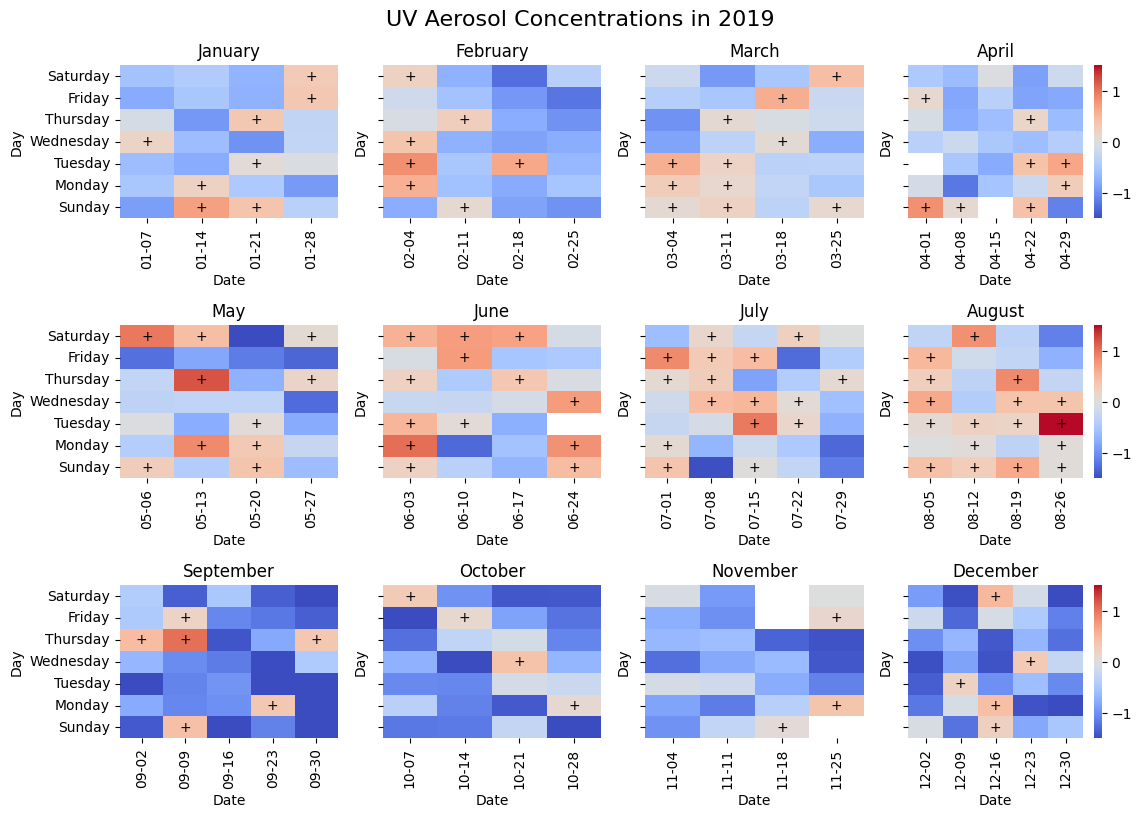

In [ ]:
#Heatmaps 2019
A4_WIDTH = 11.7
A4_HEIGHT = 8.3

fig, axes = plt.subplots(3, 4, figsize=(A4_WIDTH, A4_HEIGHT))

months_2019 = pd.date_range(start='2019-01-01', end='2019-12-31', freq='MS')

for idx, month in enumerate(months_2019):
    start_date = month
    end_date = start_date + pd.offsets.MonthEnd(0)

    selected = fulldf_UV_Aerosol[(fulldf_UV_Aerosol['Date'] >= start_date) & (fulldf_UV_Aerosol['Date'] <= end_date)]
    selected = selected.sort_values(by='Date', ascending=True)
    selected['Date'] = selected['Date'].astype(str)

    pivoted = selected.pivot_table(index="Day", columns="Date", values="Max UV_Aerosol Concentration")
    row_order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
    row_order = row_order[::-1]
    pivoted = pivoted.reindex(row_order)

    row_idx = idx // 4
    col_idx = idx % 4
    ax = axes[row_idx, col_idx]
    sns.heatmap(pivoted, cmap="coolwarm", annot=False, ax=ax, cbar=col_idx == 3, vmin=-1.5, vmax=1.5)

    if col_idx == 0:
        ax.set_yticklabels(row_order)
    else:
        ax.set_yticklabels([])

    ax.set_xticklabels([date[5:] for date in pivoted.columns])

    # Adding plus sign to positive values
    for i in range(len(pivoted)):
        for j in range(len(pivoted.columns)):
            if pivoted.iloc[i, j] > 0:
                ax.text(j + 0.5, i + 0.5, '+', ha='center', va='center', color='black')

    ax.set_title(start_date.strftime("%B"))

plt.suptitle("UV Aerosol Concentrations in 2019", fontsize=16)

plt.tight_layout()
plt.savefig(drive_folder_path + 'combined_heatmaps_2019.png', dpi=300)

plt.show()


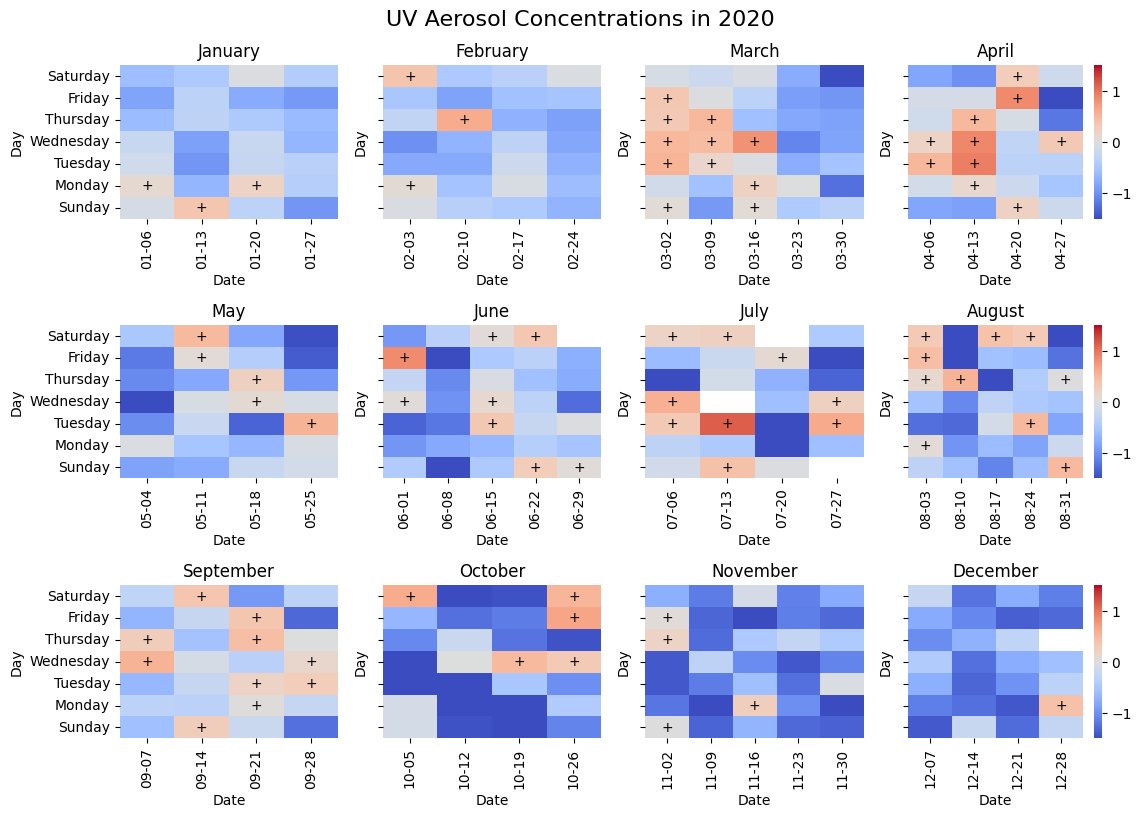

In [ ]:
#Heatmaps 2020
A4_WIDTH = 11.7
A4_HEIGHT = 8.3

fig, axes = plt.subplots(3, 4, figsize=(A4_WIDTH, A4_HEIGHT))

months_2020 = pd.date_range(start='2020-01-01', end='2020-12-31', freq='MS')

for idx, month in enumerate(months_2020):
    start_date = month
    end_date = start_date + pd.offsets.MonthEnd(0)

    selected = fulldf_UV_Aerosol[(fulldf_UV_Aerosol['Date'] >= start_date) & (fulldf_UV_Aerosol['Date'] <= end_date)]
    selected = selected.sort_values(by='Date', ascending=True)
    selected['Date'] = selected['Date'].astype(str)

    pivoted = selected.pivot_table(index="Day", columns="Date", values="Max UV_Aerosol Concentration")
    row_order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
    row_order = row_order[::-1]
    pivoted = pivoted.reindex(row_order)

    row_idx = idx // 4
    col_idx = idx % 4
    ax = axes[row_idx, col_idx]
    sns.heatmap(pivoted, cmap="coolwarm", annot=False, ax=ax, cbar=col_idx == 3, vmin=-1.5, vmax=1.5)

    if col_idx == 0:
        ax.set_yticklabels(row_order)
    else:
        ax.set_yticklabels([])

    ax.set_xticklabels([date[5:] for date in pivoted.columns])

    # Adding plus sign to positive values
    for i in range(len(pivoted)):
        for j in range(len(pivoted.columns)):
            if pivoted.iloc[i, j] > 0:
                ax.text(j + 0.5, i + 0.5, '+', ha='center', va='center', color='black')

    ax.set_title(start_date.strftime("%B"))

plt.suptitle("UV Aerosol Concentrations in 2020", fontsize=16)

plt.tight_layout()
plt.savefig(drive_folder_path + 'combined_heatmaps_2020.png', dpi=300)

plt.show()


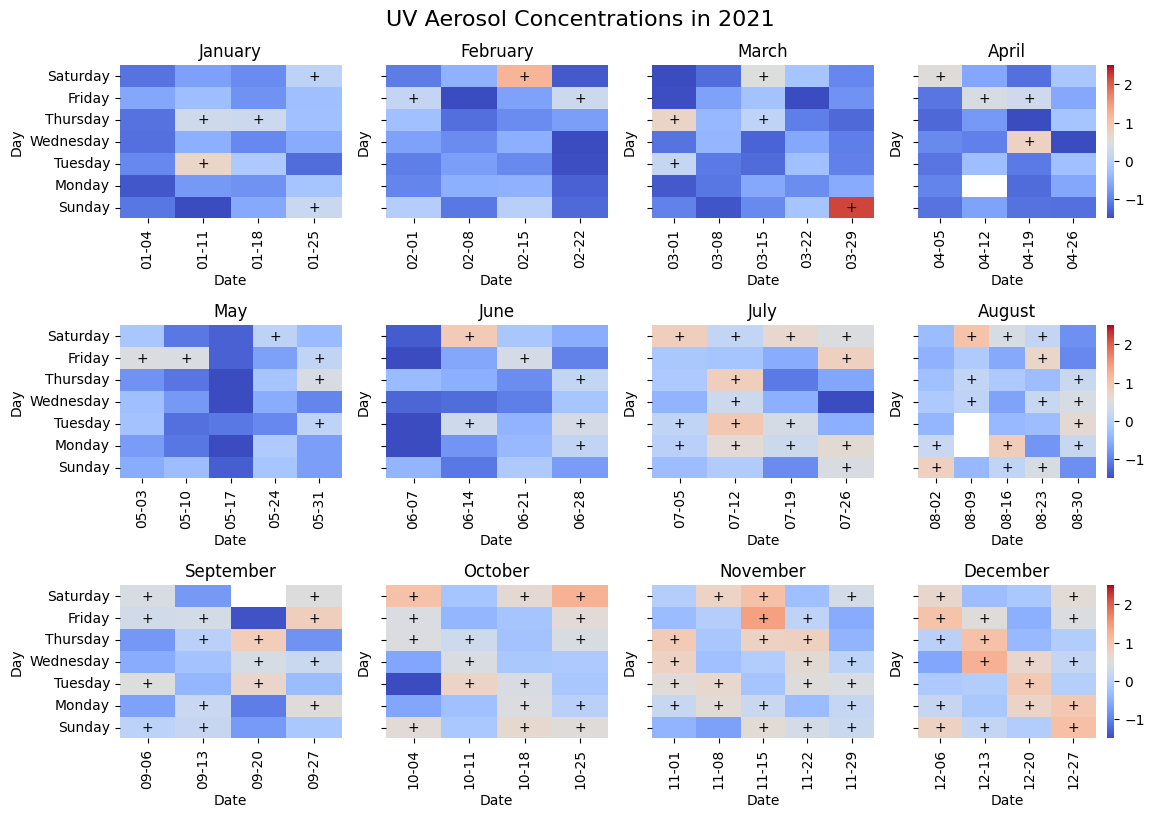

In [ ]:
#Heatmaps 2021
A4_WIDTH = 11.7
A4_HEIGHT = 8.3

fig, axes = plt.subplots(3, 4, figsize=(A4_WIDTH, A4_HEIGHT))

months_2021 = pd.date_range(start='2021-01-01', end='2021-12-31', freq='MS')

for idx, month in enumerate(months_2021):
    start_date = month
    end_date = start_date + pd.offsets.MonthEnd(0)

    selected = fulldf_UV_Aerosol[(fulldf_UV_Aerosol['Date'] >= start_date) & (fulldf_UV_Aerosol['Date'] <= end_date)]
    selected = selected.sort_values(by='Date', ascending=True)
    selected['Date'] = selected['Date'].astype(str)

    pivoted = selected.pivot_table(index="Day", columns="Date", values="Max UV_Aerosol Concentration")
    row_order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
    row_order = row_order[::-1]
    pivoted = pivoted.reindex(row_order)

    row_idx = idx // 4
    col_idx = idx % 4
    ax = axes[row_idx, col_idx]
    sns.heatmap(pivoted, cmap="coolwarm", annot=False, ax=ax, cbar=col_idx == 3, vmin=-1.5, vmax=1.5)

    if col_idx == 0:
        ax.set_yticklabels(row_order)
    else:
        ax.set_yticklabels([])

    ax.set_xticklabels([date[5:] for date in pivoted.columns])

    # Adding plus sign to positive values
    for i in range(len(pivoted)):
        for j in range(len(pivoted.columns)):
            if pivoted.iloc[i, j] > 0:
                ax.text(j + 0.5, i + 0.5, '+', ha='center', va='center', color='black')

    ax.set_title(start_date.strftime("%B"))

plt.suptitle("UV Aerosol Concentrations in 2021", fontsize=16)

plt.tight_layout()
plt.savefig(drive_folder_path + 'combined_heatmaps_2021.png', dpi=300)

plt.show()


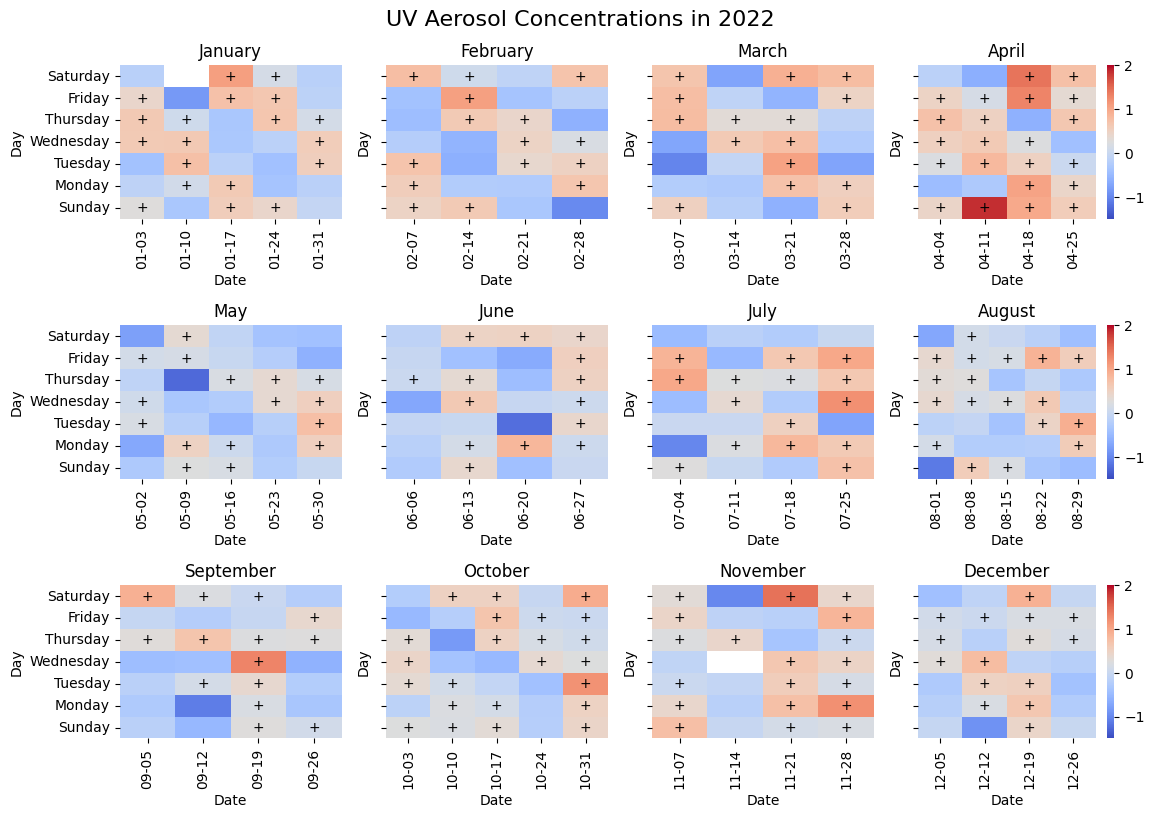

In [ ]:
#Heatmaps 2022
A4_WIDTH = 11.7
A4_HEIGHT = 8.3

fig, axes = plt.subplots(3, 4, figsize=(A4_WIDTH, A4_HEIGHT))

months_2022 = pd.date_range(start='2022-01-01', end='2022-12-31', freq='MS')

for idx, month in enumerate(months_2022):
    start_date = month
    end_date = start_date + pd.offsets.MonthEnd(0)

    selected = fulldf_UV_Aerosol[(fulldf_UV_Aerosol['Date'] >= start_date) & (fulldf_UV_Aerosol['Date'] <= end_date)]
    selected = selected.sort_values(by='Date', ascending=True)
    selected['Date'] = selected['Date'].astype(str)

    pivoted = selected.pivot_table(index="Day", columns="Date", values="Max UV_Aerosol Concentration")
    row_order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
    row_order = row_order[::-1]
    pivoted = pivoted.reindex(row_order)

    row_idx = idx // 4
    col_idx = idx % 4
    ax = axes[row_idx, col_idx]
    sns.heatmap(pivoted, cmap="coolwarm", annot=False, ax=ax, cbar=col_idx == 3, vmin=-1.5, vmax=1.5)

    if col_idx == 0:
        ax.set_yticklabels(row_order)
    else:
        ax.set_yticklabels([])

    ax.set_xticklabels([date[5:] for date in pivoted.columns])

    # Adding plus sign to positive values
    for i in range(len(pivoted)):
        for j in range(len(pivoted.columns)):
            if pivoted.iloc[i, j] > 0:
                ax.text(j + 0.5, i + 0.5, '+', ha='center', va='center', color='black')

    ax.set_title(start_date.strftime("%B"))

plt.suptitle("UV Aerosol Concentrations in 2022", fontsize=16)

plt.tight_layout()
plt.savefig(drive_folder_path + 'combined_heatmaps_2022.png', dpi=300)

plt.show()


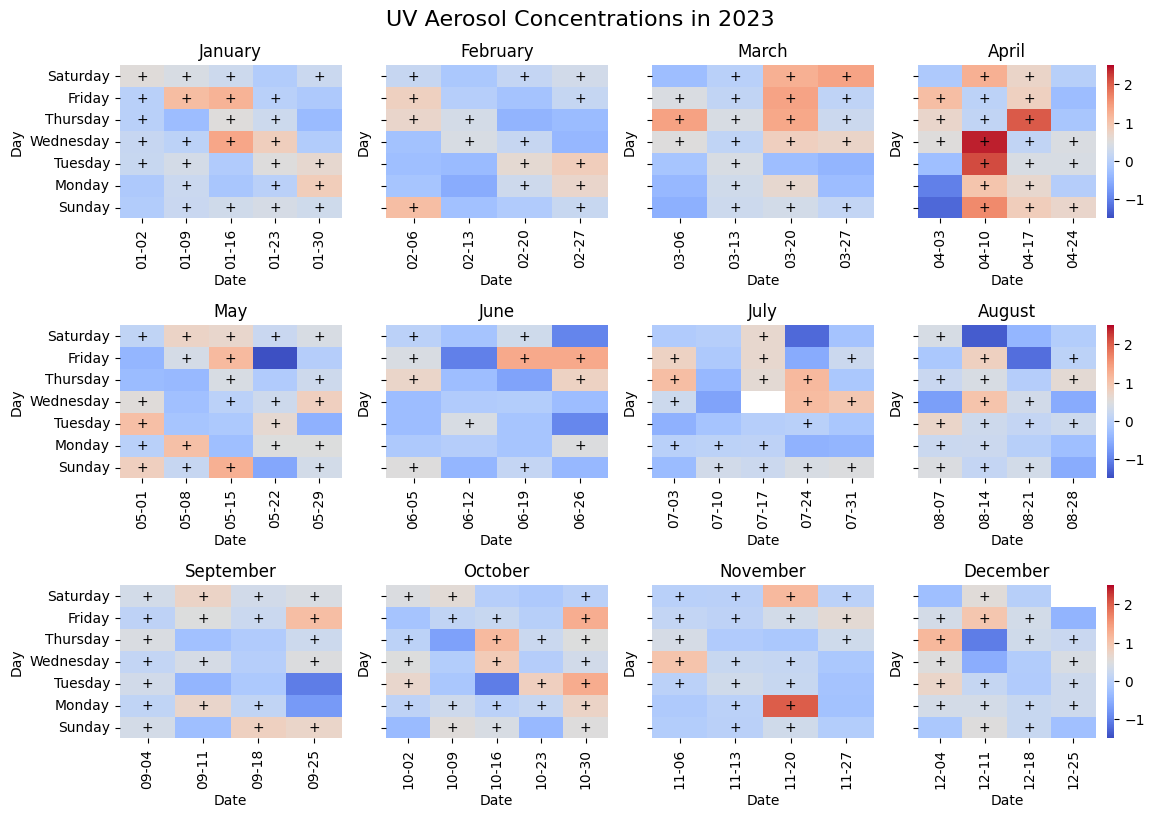

In [ ]:
#Heatmaps 2023
A4_WIDTH = 11.7
A4_HEIGHT = 8.3

fig, axes = plt.subplots(3, 4, figsize=(A4_WIDTH, A4_HEIGHT))

months_2023 = pd.date_range(start='2023-01-01', end='2023-12-31', freq='MS')

for idx, month in enumerate(months_2023):
    start_date = month
    end_date = start_date + pd.offsets.MonthEnd(0)

    selected = fulldf_UV_Aerosol[(fulldf_UV_Aerosol['Date'] >= start_date) & (fulldf_UV_Aerosol['Date'] <= end_date)]
    selected = selected.sort_values(by='Date', ascending=True)
    selected['Date'] = selected['Date'].astype(str)

    pivoted = selected.pivot_table(index="Day", columns="Date", values="Max UV_Aerosol Concentration")
    row_order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
    row_order = row_order[::-1]
    pivoted = pivoted.reindex(row_order)

    row_idx = idx // 4
    col_idx = idx % 4
    ax = axes[row_idx, col_idx]
    sns.heatmap(pivoted, cmap="coolwarm", annot=False, ax=ax, cbar=col_idx == 3, vmin=-1.5, vmax=1.5)

    if col_idx == 0:
        ax.set_yticklabels(row_order)
    else:
        ax.set_yticklabels([])

    ax.set_xticklabels([date[5:] for date in pivoted.columns])

    # Adding plus sign to positive values
    for i in range(len(pivoted)):
        for j in range(len(pivoted.columns)):
            if pivoted.iloc[i, j] > 0:
                ax.text(j + 0.5, i + 0.5, '+', ha='center', va='center', color='black')

    ax.set_title(start_date.strftime("%B"))

plt.suptitle("UV Aerosol Concentrations in 2023", fontsize=16)

plt.tight_layout()
plt.savefig(drive_folder_path + 'combined_heatmaps_2023.png', dpi=300)

plt.show()


# CO

In [ ]:
#CO for KyoHwaSo
CO = ee.ImageCollection("COPERNICUS/S5P/NRTI/L3_CO")
CO19to23= CO.filterBounds(KyoHwaSo).filterDate("2019-01-01", "2023-12-31")

CO2019 = CO.filterBounds(KyoHwaSo).filterDate("2019-01-01", "2019-12-31")
CO2020 = CO.filterBounds(KyoHwaSo).filterDate("2020-01-01", "2020-12-31")
CO2021 = CO.filterBounds(KyoHwaSo).filterDate("2021-01-01", "2021-12-31")
CO2022 = CO.filterBounds(KyoHwaSo).filterDate("2022-01-01", "2022-12-31")
CO2023 = CO.filterBounds(KyoHwaSo).filterDate("2023-01-01", "2023-12-31")

In [ ]:
#Yearly mean for CO
mean_CO19 = CO2019.mean().reduceRegion(reducer=ee.Reducer.mean(), geometry=KyoHwaSo, scale=100)
meanCO2019 = mean_CO19.get('CO_column_number_density')
mean_CO20 = CO2020.mean().reduceRegion(reducer=ee.Reducer.mean(), geometry=KyoHwaSo, scale=100)
meanCO2020 = mean_CO20.get('CO_column_number_density')
mean_CO21 = CO2021.mean().reduceRegion(reducer=ee.Reducer.mean(), geometry=KyoHwaSo, scale=100)
meanCO2021 = mean_CO21.get('CO_column_number_density')
mean_CO22 = CO2022.mean().reduceRegion(reducer=ee.Reducer.mean(), geometry=KyoHwaSo, scale=100)
meanCO2022 = mean_CO22.get('CO_column_number_density')
mean_CO23 = CO2023.mean().reduceRegion(reducer=ee.Reducer.mean(), geometry=KyoHwaSo, scale=100)
meanCO2023 = mean_CO23.get('CO_column_number_density')

In [ ]:
#table for yearly means
data = [
    ['2019', meanCO2019.getInfo()],
    ['2020', meanCO2020.getInfo()],
    ['2021', meanCO2021.getInfo()],
    ['2022', meanCO2022.getInfo()],
    ['2023', meanCO2023.getInfo()]
]

print(tabulate(data, headers=['Year', 'CO (mol/m2)']))

  Year    CO (mol/m2)
------  -------------
  2019      0.0378655
  2020      0.0377188
  2021      0.0379446
  2022      0.0337091
  2023      0.0361843


In [ ]:
#computed CO min
def computeCOmin(img):
    date = ee.Date(img.get('system:time_start'))
    CO = img.select('CO_column_number_density')
    min_CO = CO.reduceRegion(reducer=ee.Reducer.min(), geometry=KyoHwaSo, scale=100)
    return ee.Feature(None, {'date': date.format('YYYY-MM-dd'), 'min_CO': min_CO})

#computed CO mean
def computeCOMean(img):
    date = ee.Date(img.get('system:time_start'))
    CO = img.select('CO_column_number_density')
    mean_CO = CO.reduceRegion(reducer=ee.Reducer.mean(), geometry=KyoHwaSo, scale=100)
    return ee.Feature(None, {'date': date.format('YYYY-MM-dd'), 'mean_CO': mean_CO})

#computed CO max
def computeCOmax(img):
    date = ee.Date(img.get('system:time_start'))
    CO = img.select('CO_column_number_density')
    max_CO = CO.reduceRegion(reducer=ee.Reducer.max(), geometry=KyoHwaSo, scale=100)
    return ee.Feature(None, {'date': date.format('YYYY-MM-dd'), 'max_CO': max_CO})

In [ ]:
#min - map for year 2019-2023
min_daily_average_CO = CO19to23.map(computeCOmin)

min_results_CO = min_daily_average_CO.aggregate_array('min_CO')
dates_min_CO = min_daily_average_CO.aggregate_array('date')

min_CO_values = min_results_CO.getInfo()
dates_min_CO_list = dates_min_CO.getInfo()

#change to datetime obj
datetime_dates_min_CO = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates_min_CO_list]

#combine dates_min_CO with CO average
min_combined_data_CO = [{'date': date, 'min_CO': min_CO} for date, min_CO in zip(dates_min_CO_list, min_CO_values)]

cNames = ['Year', 'Date', 'Min CO Concentration', 'Mean CO Concentration', 'Max CO Concentration', 'Mean Rainfall']

days = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]
numbers = [0,1,2,3,4,5,6]
fulldf_CO = pd.DataFrame(columns=cNames)

for i in range(len(numbers)):
  print(numbers[i])
  print(days[i])
  min_monday_data_CO = [item for item, date in zip(min_combined_data_CO, datetime_dates_min_CO) if date.weekday() == numbers[i]]


#combine data with avg CO
  min_filteredmondata_CO = [item for item in min_monday_data_CO if item['min_CO']['CO_column_number_density'] is not None]

#mean - map for year 2019-2023
  mean_daily_average_CO = CO19to23.map(computeCOMean)

  mean_results_CO = mean_daily_average_CO.aggregate_array('mean_CO')
  dates_mean_CO = mean_daily_average_CO.aggregate_array('date')

  mean_CO_values = mean_results_CO.getInfo()
  dates_mean_CO_list = dates_mean_CO.getInfo()
  datetime_dates_mean_CO = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates_mean_CO_list]
  mean_combined_data_CO = [{'date': date, 'mean_CO': mean_CO} for date, mean_CO in zip(dates_mean_CO_list, mean_CO_values)]
  mean_monday_data_CO = [item for item, date in zip(mean_combined_data_CO, datetime_dates_mean_CO) if date.weekday() == numbers[i]]

  mean_filteredmondata_CO = [item for item in mean_monday_data_CO if item['mean_CO']['CO_column_number_density'] is not None]

  #max - map for year 2019-2023
  max_daily_average_CO = CO19to23.map(computeCOmax)

  max_results_CO = max_daily_average_CO.aggregate_array('max_CO')
  dates_max = max_daily_average_CO.aggregate_array('date')

  max_CO_values = max_results_CO.getInfo()
  dates_max_list_CO = dates_max.getInfo()
  datetime_dates_max = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates_max_list_CO]
  max_combined_data_CO = [{'date': date, 'max_CO': max_CO} for date, max_CO in zip(dates_max_list_CO, max_CO_values)]
  max_monday_data_CO = [item for item, date in zip(max_combined_data_CO, datetime_dates_max) if date.weekday() == numbers[i]]

  max_filteredmondata_CO = [item for item in max_monday_data_CO if item['max_CO']['CO_column_number_density'] is not None]


  #list has more than one value for dates - calculating average
  from collections import defaultdict

  daily_min_dict_CO = defaultdict(list)

  # Populating dictionary with min CO values
  for item in min_filteredmondata_CO:
      date = item['date']
      min_CO = item['min_CO']['CO_column_number_density']
      daily_min_dict_CO[date].append(min_CO)

  # average min CO for each day
  daily_min_CO = [{'date': date, 'min_CO': sum(values) / len(values)} for date, values in daily_min_dict_CO.items()]

  #Mean

  daily_mean_dict_CO = defaultdict(list)

  for item in mean_filteredmondata_CO:
      date = item['date']
      mean_CO = item['mean_CO']['CO_column_number_density']
      daily_mean_dict_CO[date].append(mean_CO)

  #Max
  daily_max_dict_CO = defaultdict(list)

  for item in max_filteredmondata_CO:
      date = item['date']
      max_CO = item['max_CO']['CO_column_number_density']
      daily_max_dict_CO[date].append(max_CO)

  daily_mean_dict_rain = defaultdict(list)


  # average min CO for each day
  daily_min_CO = [{'date': date, 'min_CO': sum(values) / len(values)} for date, values in daily_min_dict_CO.items()]
  daily_mean_CO = [{'date': date, 'mean_CO': sum(values) / len(values)} for date, values in daily_mean_dict_CO.items()]
  daily_max_CO = [{'date': date, 'max_CO': sum(values) / len(values)} for date, values in daily_max_dict_CO.items()]

  # Combined into single DataFrame
  df_min_CO = pd.DataFrame(daily_min_CO)
  df_mean_CO = pd.DataFrame(daily_mean_CO)
  df_max_CO = pd.DataFrame(daily_max_CO)

  # Merge dataframes on date
  df_combined_CO = df_min_CO.merge(df_mean_CO, on='date').merge(df_max_CO, on='date')

  # Convert date column to datetime type
  df_combined_CO['date'] = pd.to_datetime(df_combined_CO['date'])

  # Extract year and weekday from the date
  df_combined_CO['Year'] = df_combined_CO['date'].dt.year
  df_combined_CO['Monday'] = df_combined_CO['date'] - pd.to_timedelta(df_combined_CO['date'].dt.dayofweek, unit='D')
  df_combined_CO.drop(columns=['date'], inplace=True)

  # Reset index to start from 0
  df_combined_CO.reset_index(drop=True, inplace=True)

  # Reorder and rename columns
  df_combined_CO = df_combined_CO[['Year', 'Monday', 'min_CO', 'mean_CO', 'max_CO']]

  df_combined_CO.columns = ['Year', 'Date', 'Min CO Concentration', 'Mean CO Concentration', 'Max CO Concentration']
  df_combined_CO["Day"] = days[i]


  print(df_combined_CO.head())
  fulldf_CO = pd.concat([fulldf_CO, df_combined_CO],ignore_index=True)


0
Sunday
   Year       Date  Min CO Concentration  Mean CO Concentration  \
0  2019 2019-01-07              0.028714               0.032849   
1  2019 2019-01-14              0.037137               0.040738   
2  2019 2019-01-21              0.032356               0.037514   
3  2019 2019-01-28              0.031893               0.035569   
4  2019 2019-02-04              0.036392               0.036392   

   Max CO Concentration     Day  
0              0.036843  Sunday  
1              0.045584  Sunday  
2              0.041722  Sunday  
3              0.039857  Sunday  
4              0.036392  Sunday  
1
Monday
   Year       Date  Min CO Concentration  Mean CO Concentration  \
0  2019 2018-12-31              0.030981               0.032720   
1  2019 2019-01-07              0.031707               0.034373   
2  2019 2019-01-14              0.039789               0.049594   
3  2019 2019-01-21              0.030648               0.034784   
4  2019 2019-01-28              0.030920

In [ ]:
fulldf_CO.to_csv(os.path.join(drive_directory, 'CO_full.csv'), index=False)

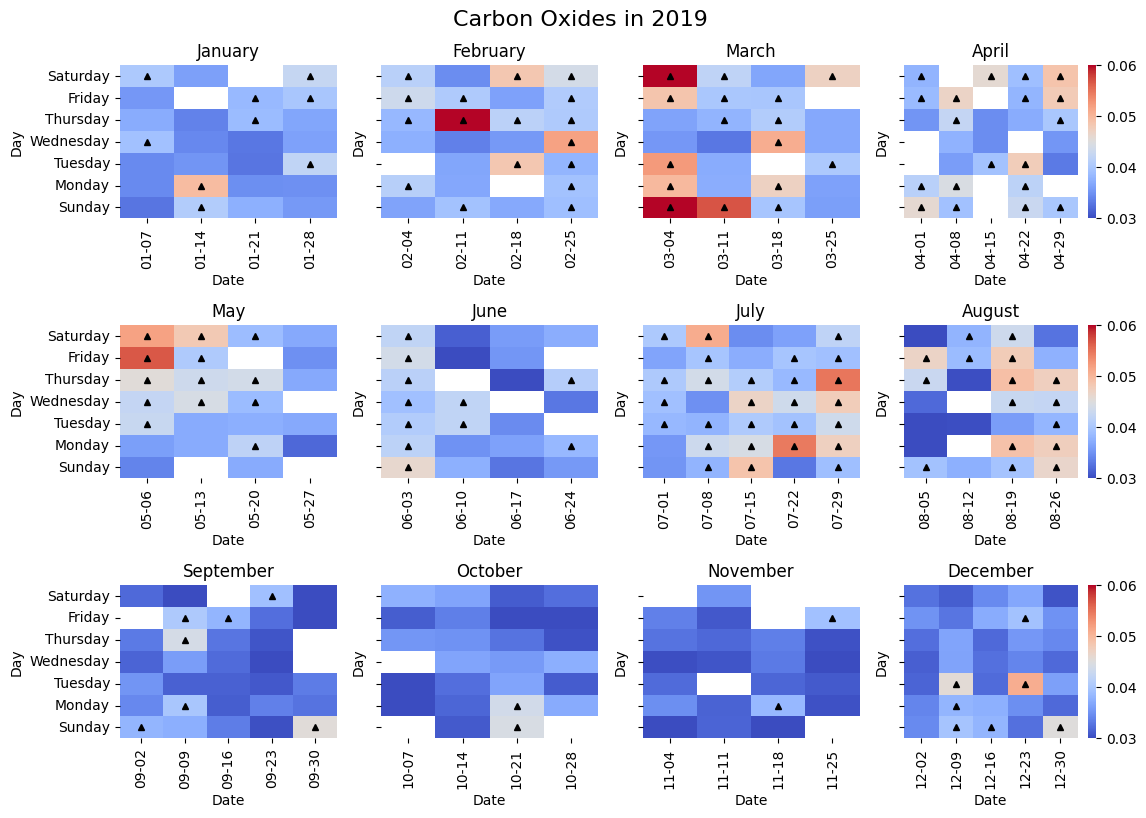

In [ ]:
#CO heatmaps 2019
A4_WIDTH = 11.7
A4_HEIGHT = 8.3

fig, axes = plt.subplots(3, 4, figsize=(A4_WIDTH, A4_HEIGHT))

months_2019 = pd.date_range(start='2019-01-01', end='2019-12-31', freq='MS')

for idx, month in enumerate(months_2019):
    start_date = month
    end_date = start_date + pd.offsets.MonthEnd(0)

    selected = fulldf_CO[(fulldf_CO['Date'] >= start_date) & (fulldf_CO['Date'] <= end_date)]
    selected = selected.sort_values(by='Date', ascending=True)
    selected['Date'] = selected['Date'].astype(str)

    pivoted = selected.pivot_table(index="Day", columns="Date", values="Mean CO Concentration")
    row_order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
    row_order = row_order[::-1]
    pivoted = pivoted.reindex(row_order)

    mean_CO_2019 = meanCO2019.getInfo()

    row_idx = idx // 4
    col_idx = idx % 4
    ax = axes[row_idx, col_idx]
    sns.heatmap(pivoted, cmap="coolwarm", annot=False, ax=ax, cbar=col_idx == 3, vmin=0.03, vmax=0.06)

    if col_idx == 0:
        ax.set_yticklabels(row_order)
    else:
        ax.set_yticklabels([])

    ax.set_xticklabels([date[5:] for date in pivoted.columns])

    # Adding a triangle marker to the cell if CO concentration exceeds the mean CO value
    for i in range(len(pivoted.index)):
        for j in range(len(pivoted.columns)):
            value = pivoted.iloc[i, j]
            if value > mean_CO_2019:
                ax.plot(j + 0.5, i + 0.5, marker='^', color='black', markersize=5)

    ax.set_title(start_date.strftime("%B"))

plt.suptitle("Carbon Oxides in 2019", fontsize=16)

plt.tight_layout()
plt.savefig(drive_folder_path + 'combined_heatmaps_CO_2019.png', dpi=300)

plt.show()


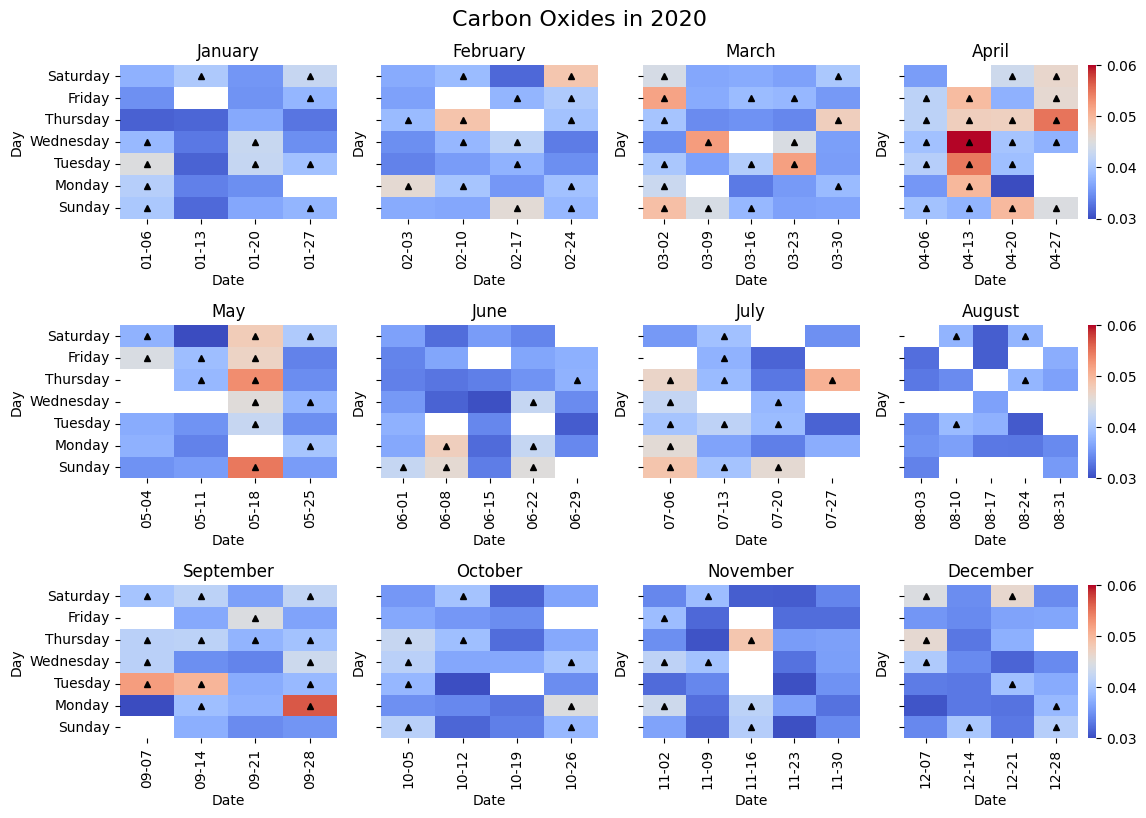

In [ ]:
#CO heatmaps 2020
A4_WIDTH = 11.7
A4_HEIGHT = 8.3

fig, axes = plt.subplots(3, 4, figsize=(A4_WIDTH, A4_HEIGHT))

months_2020 = pd.date_range(start='2020-01-01', end='2020-12-31', freq='MS')

for idx, month in enumerate(months_2020):
    start_date = month
    end_date = start_date + pd.offsets.MonthEnd(0)

    selected = fulldf_CO[(fulldf_CO['Date'] >= start_date) & (fulldf_CO['Date'] <= end_date)]
    selected = selected.sort_values(by='Date', ascending=True)
    selected['Date'] = selected['Date'].astype(str)

    pivoted = selected.pivot_table(index="Day", columns="Date", values="Mean CO Concentration")
    row_order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
    row_order = row_order[::-1]
    pivoted = pivoted.reindex(row_order)

    mean_CO_2020 = meanCO2020.getInfo()

    row_idx = idx // 4
    col_idx = idx % 4
    ax = axes[row_idx, col_idx]
    sns.heatmap(pivoted, cmap="coolwarm", annot=False, ax=ax, cbar=col_idx == 3, vmin=0.03, vmax=0.06)

    if col_idx == 0:
        ax.set_yticklabels(row_order)
    else:
        ax.set_yticklabels([])

    ax.set_xticklabels([date[5:] for date in pivoted.columns])

    # Adding a triangle marker to the cell if CO concentration exceeds the mean CO value
    for i in range(len(pivoted.index)):
        for j in range(len(pivoted.columns)):
            value = pivoted.iloc[i, j]
            if value > mean_CO_2020:
                ax.plot(j + 0.5, i + 0.5, marker='^', color='black', markersize=5)

    ax.set_title(start_date.strftime("%B"))

plt.suptitle("Carbon Oxides in 2020", fontsize=16)

plt.tight_layout()
plt.savefig(drive_folder_path + 'combined_heatmaps_CO_2020.png', dpi=300)

plt.show()


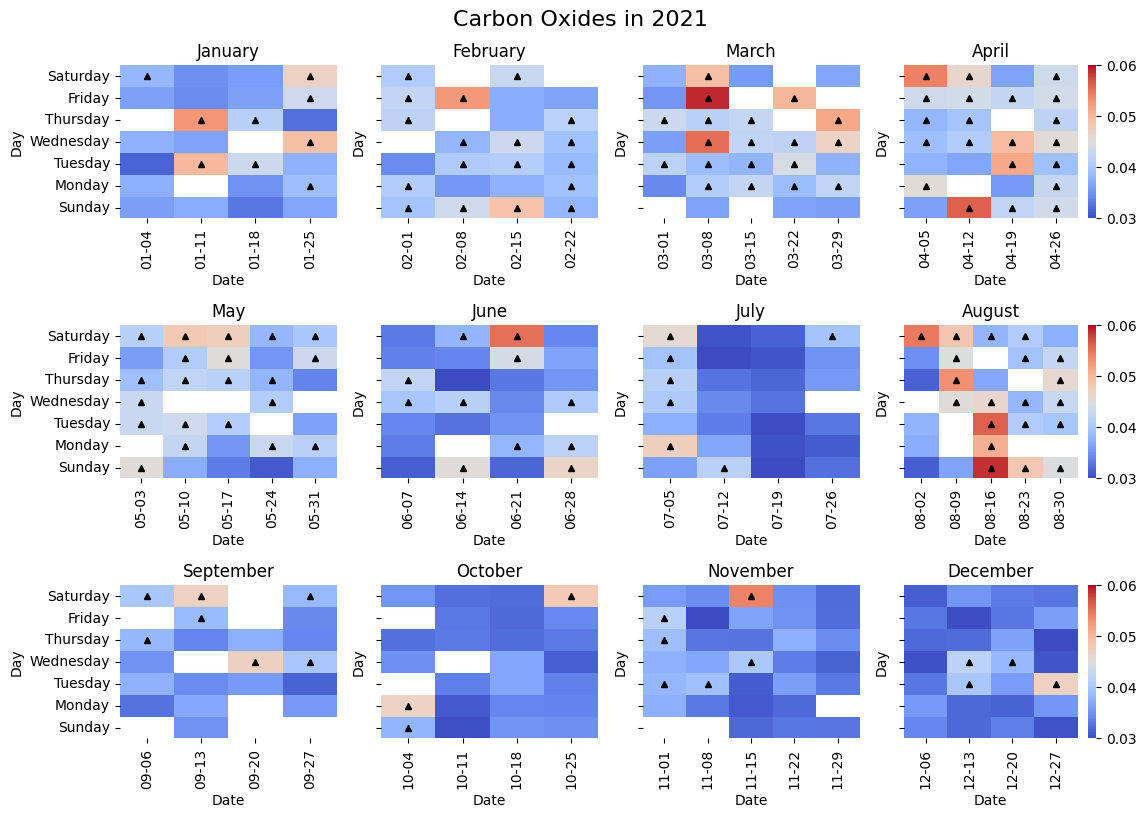

In [ ]:
#CO heatmaps 2021
A4_WIDTH = 11.7
A4_HEIGHT = 8.3

fig, axes = plt.subplots(3, 4, figsize=(A4_WIDTH, A4_HEIGHT))

months_2021 = pd.date_range(start='2021-01-01', end='2021-12-31', freq='MS')

for idx, month in enumerate(months_2021):
    start_date = month
    end_date = start_date + pd.offsets.MonthEnd(0)

    selected = fulldf_CO[(fulldf_CO['Date'] >= start_date) & (fulldf_CO['Date'] <= end_date)]
    selected = selected.sort_values(by='Date', ascending=True)
    selected['Date'] = selected['Date'].astype(str)

    pivoted = selected.pivot_table(index="Day", columns="Date", values="Mean CO Concentration")
    row_order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
    row_order = row_order[::-1]
    pivoted = pivoted.reindex(row_order)

    mean_CO_2021 = meanCO2021.getInfo()

    row_idx = idx // 4
    col_idx = idx % 4
    ax = axes[row_idx, col_idx]
    sns.heatmap(pivoted, cmap="coolwarm", annot=False, ax=ax, cbar=col_idx == 3, vmin=0.03, vmax=0.06)

    if col_idx == 0:
        ax.set_yticklabels(row_order)
    else:
        ax.set_yticklabels([])

    ax.set_xticklabels([date[5:] for date in pivoted.columns])

    # Adding a triangle marker to the cell if CO concentration exceeds the mean CO value
    for i in range(len(pivoted.index)):
        for j in range(len(pivoted.columns)):
            value = pivoted.iloc[i, j]
            if value > mean_CO_2021:
                ax.plot(j + 0.5, i + 0.5, marker='^', color='black', markersize=5)

    ax.set_title(start_date.strftime("%B"))

plt.suptitle("Carbon Oxides in 2021", fontsize=16)

plt.tight_layout()
plt.savefig(drive_folder_path + 'combined_heatmaps_CO_2021.png', dpi=300)

plt.show()


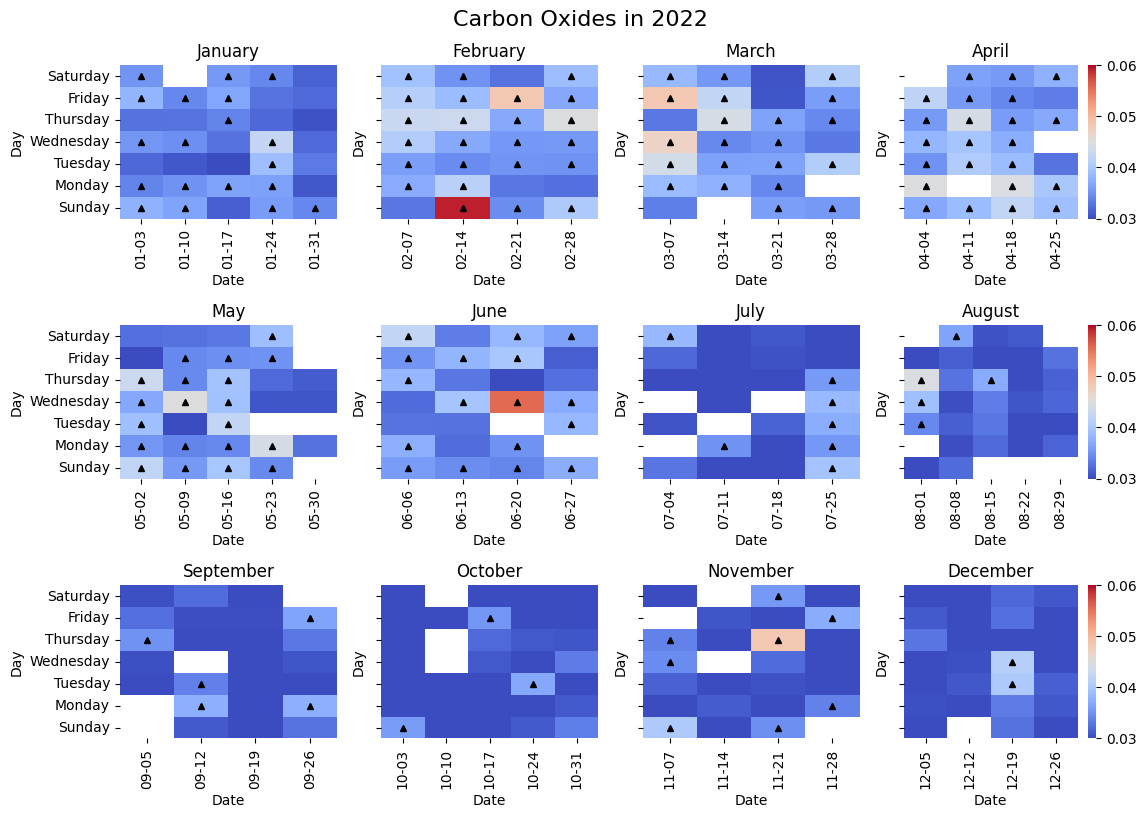

In [ ]:
#CO heatmaps 2022
A4_WIDTH = 11.7
A4_HEIGHT = 8.3

fig, axes = plt.subplots(3, 4, figsize=(A4_WIDTH, A4_HEIGHT))

months_2022 = pd.date_range(start='2022-01-01', end='2022-12-31', freq='MS')

for idx, month in enumerate(months_2022):
    start_date = month
    end_date = start_date + pd.offsets.MonthEnd(0)

    selected = fulldf_CO[(fulldf_CO['Date'] >= start_date) & (fulldf_CO['Date'] <= end_date)]
    selected = selected.sort_values(by='Date', ascending=True)
    selected['Date'] = selected['Date'].astype(str)

    pivoted = selected.pivot_table(index="Day", columns="Date", values="Mean CO Concentration")
    row_order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
    row_order = row_order[::-1]
    pivoted = pivoted.reindex(row_order)

    mean_CO_2022 = meanCO2022.getInfo()

    row_idx = idx // 4
    col_idx = idx % 4
    ax = axes[row_idx, col_idx]
    sns.heatmap(pivoted, cmap="coolwarm", annot=False, ax=ax, cbar=col_idx == 3, vmin=0.03, vmax=0.06)

    if col_idx == 0:
        ax.set_yticklabels(row_order)
    else:
        ax.set_yticklabels([])

    ax.set_xticklabels([date[5:] for date in pivoted.columns])

    # Adding a triangle marker to the cell if CO concentration exceeds the mean CO value
    for i in range(len(pivoted.index)):
        for j in range(len(pivoted.columns)):
            value = pivoted.iloc[i, j]
            if value > mean_CO_2022:
                ax.plot(j + 0.5, i + 0.5, marker='^', color='black', markersize=5)

    ax.set_title(start_date.strftime("%B"))

plt.suptitle("Carbon Oxides in 2022", fontsize=16)

plt.tight_layout()
plt.savefig(drive_folder_path + 'combined_heatmaps_CO_2022.png', dpi=300)

plt.show()


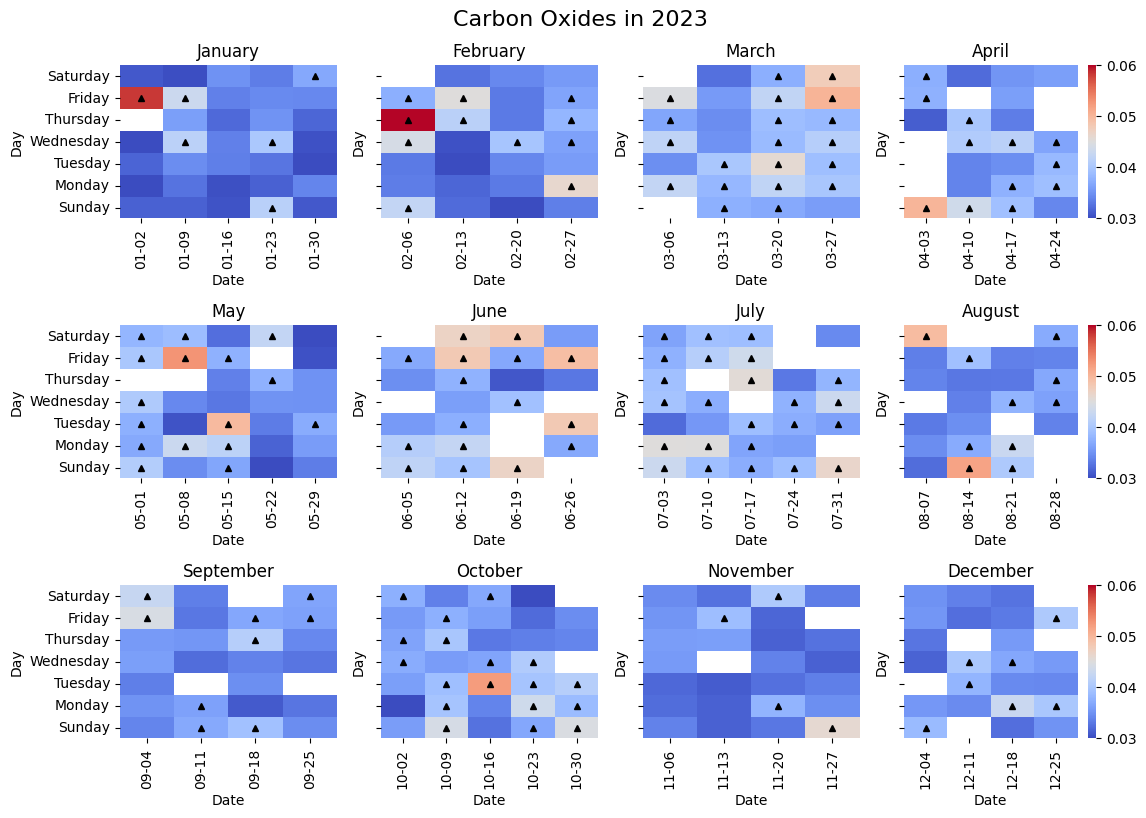

In [ ]:
#CO heatmaps 2023
A4_WIDTH = 11.7
A4_HEIGHT = 8.3

fig, axes = plt.subplots(3, 4, figsize=(A4_WIDTH, A4_HEIGHT))

months_2023 = pd.date_range(start='2023-01-01', end='2023-12-31', freq='MS')

for idx, month in enumerate(months_2023):
    start_date = month
    end_date = start_date + pd.offsets.MonthEnd(0)

    selected = fulldf_CO[(fulldf_CO['Date'] >= start_date) & (fulldf_CO['Date'] <= end_date)]
    selected = selected.sort_values(by='Date', ascending=True)
    selected['Date'] = selected['Date'].astype(str)

    pivoted = selected.pivot_table(index="Day", columns="Date", values="Mean CO Concentration")
    row_order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
    row_order = row_order[::-1]
    pivoted = pivoted.reindex(row_order)

    mean_CO_2023 = meanCO2023.getInfo()

    row_idx = idx // 4
    col_idx = idx % 4
    ax = axes[row_idx, col_idx]
    sns.heatmap(pivoted, cmap="coolwarm", annot=False, ax=ax, cbar=col_idx == 3, vmin=0.03, vmax=0.06)

    if col_idx == 0:
        ax.set_yticklabels(row_order)
    else:
        ax.set_yticklabels([])

    ax.set_xticklabels([date[5:] for date in pivoted.columns])

    # Adding a triangle marker to the cell if CO concentration exceeds the mean CO value
    for i in range(len(pivoted.index)):
        for j in range(len(pivoted.columns)):
            value = pivoted.iloc[i, j]
            if value > mean_CO_2023:
                ax.plot(j + 0.5, i + 0.5, marker='^', color='black', markersize=5)

    ax.set_title(start_date.strftime("%B"))

plt.suptitle("Carbon Oxides in 2023", fontsize=16)

plt.tight_layout()
plt.savefig(drive_folder_path + 'combined_heatmaps_CO_2023.png', dpi=300)

plt.show()


# NO

In [ ]:
#NO for KyoHwaSo
NO = ee.ImageCollection("COPERNICUS/S5P/NRTI/L3_NO2")
NO19to23= NO.filterBounds(KyoHwaSo).filterDate("2019-01-01", "2023-12-31")

NO2019 = NO.filterBounds(KyoHwaSo).filterDate("2019-01-01", "2019-12-31")
NO2020 = NO.filterBounds(KyoHwaSo).filterDate("2020-01-01", "2020-12-31")
NO2021 = NO.filterBounds(KyoHwaSo).filterDate("2021-01-01", "2021-12-31")
NO2022 = NO.filterBounds(KyoHwaSo).filterDate("2022-01-01", "2022-12-31")
NO2023 = NO.filterBounds(KyoHwaSo).filterDate("2023-01-01", "2023-12-31")

In [ ]:
#yearly means
mean_NO2019 = NO2019.mean().reduceRegion(reducer=ee.Reducer.mean(), geometry=KyoHwaSo, scale=100)
meanNO2019 = mean_NO2019.get('tropospheric_NO2_column_number_density')
mean_NO2020 = NO2020.mean().reduceRegion(reducer=ee.Reducer.mean(), geometry=KyoHwaSo, scale=100)
meanNO2020 = mean_NO2020.get('tropospheric_NO2_column_number_density')
mean_NO2021 = NO2021.mean().reduceRegion(reducer=ee.Reducer.mean(), geometry=KyoHwaSo, scale=100)
meanNO2021 = mean_NO2021.get('tropospheric_NO2_column_number_density')
mean_NO2022 = NO2022.mean().reduceRegion(reducer=ee.Reducer.mean(), geometry=KyoHwaSo, scale=100)
meanNO2022 = mean_NO2022.get('tropospheric_NO2_column_number_density')
mean_NO2023 = NO2023.mean().reduceRegion(reducer=ee.Reducer.mean(), geometry=KyoHwaSo, scale=100)
meanNO2023 = mean_NO2023.get('tropospheric_NO2_column_number_density')

In [ ]:
#table for yearly means
data = [
    ['2019', meanNO2019.getInfo()],
    ['2020', meanNO2020.getInfo()],
    ['2021', meanNO2021.getInfo()],
    ['2022', meanNO2022.getInfo()],
    ['2023', meanNO2023.getInfo()]
]

print(tabulate(data, headers=['Year', 'NO (mol/m2)']))

  Year    NO (mol/m2)
------  -------------
  2019    1.26137e-05
  2020    1.21484e-05
  2021    1.04612e-05
  2022    8.40374e-06
  2023    9.97843e-06


In [ ]:
#computed NO min
def computeNOmin(img):
    date = ee.Date(img.get('system:time_start'))
    NO = img.select('tropospheric_NO2_column_number_density')
    min_NO = NO.reduceRegion(reducer=ee.Reducer.min(), geometry=KyoHwaSo, scale=100)
    return ee.Feature(None, {'date': date.format('YYYY-MM-dd'), 'min_NO': min_NO})

#computed NO mean
def computeNOMean(img):
    date = ee.Date(img.get('system:time_start'))
    NO = img.select('tropospheric_NO2_column_number_density')
    mean_NO = NO.reduceRegion(reducer=ee.Reducer.mean(), geometry=KyoHwaSo, scale=100)
    return ee.Feature(None, {'date': date.format('YYYY-MM-dd'), 'mean_NO': mean_NO})

#computed NO max
def computeNOmax(img):
    date = ee.Date(img.get('system:time_start'))
    NO = img.select('tropospheric_NO2_column_number_density')
    max_NO = NO.reduceRegion(reducer=ee.Reducer.max(), geometry=KyoHwaSo, scale=100)
    return ee.Feature(None, {'date': date.format('YYYY-MM-dd'), 'max_NO': max_NO})

In [ ]:
#min - map for year 2019-2023
min_daily_average_NO = NO19to23.map(computeNOmin)

min_results_NO = min_daily_average_NO.aggregate_array('min_NO')
dates_min_NO = min_daily_average_NO.aggregate_array('date')

min_NO_values = min_results_NO.getInfo()
dates_min_NO_list = dates_min_NO.getInfo()

#change to datetime obj
datetime_dates_min_NO = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates_min_NO_list]

#combine dates_min_NO with NO average
min_combined_data_NO = [{'date': date, 'min_NO': min_NO} for date, min_NO in zip(dates_min_NO_list, min_NO_values)]

cNames = ['Year', 'Date', 'Min NO concentration', 'Mean NO Concentration', 'Max NO Concentration', 'Mean Rainfall']

days = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]
numbers = [0,1,2,3,4,5,6]
fulldf_NO = pd.DataFrame(columns=cNames)

for i in range(len(numbers)):
  print(numbers[i])
  print(days[i])
  min_monday_data_NO = [item for item, date in zip(min_combined_data_NO, datetime_dates_min_NO) if date.weekday() == numbers[i]]


#combine data with avg NO
  min_filteredmondata_NO = [item for item in min_monday_data_NO if item['min_NO']['tropospheric_NO2_column_number_density'] is not None]

#mean - map for year 2019-2023
  mean_daily_average_NO = NO19to23.map(computeNOMean)

  mean_results_NO = mean_daily_average_NO.aggregate_array('mean_NO')
  dates_mean_NO = mean_daily_average_NO.aggregate_array('date')

  mean_NO_values = mean_results_NO.getInfo()
  dates_mean_NO_list = dates_mean_NO.getInfo()
  datetime_dates_mean_NO = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates_mean_NO_list]
  mean_combined_data_NO = [{'date': date, 'mean_NO': mean_NO} for date, mean_NO in zip(dates_mean_NO_list, mean_NO_values)]
  mean_monday_data_NO = [item for item, date in zip(mean_combined_data_NO, datetime_dates_mean_NO) if date.weekday() == numbers[i]]

  mean_filteredmondata_NO = [item for item in mean_monday_data_NO if item['mean_NO']['tropospheric_NO2_column_number_density'] is not None]

  #max - map for year 2019-2023
  max_daily_average_NO = NO19to23.map(computeNOmax)

  max_results_NO = max_daily_average_NO.aggregate_array('max_NO')
  dates_max = max_daily_average_NO.aggregate_array('date')

  max_NO_values = max_results_NO.getInfo()
  dates_max_list_NO = dates_max.getInfo()
  datetime_dates_max = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates_max_list_NO]
  max_combined_data_NO = [{'date': date, 'max_NO': max_NO} for date, max_NO in zip(dates_max_list_NO, max_NO_values)]
  max_monday_data_NO = [item for item, date in zip(max_combined_data_NO, datetime_dates_max) if date.weekday() == numbers[i]]

  max_filteredmondata_NO = [item for item in max_monday_data_NO if item['max_NO']['tropospheric_NO2_column_number_density'] is not None]

  #list has more than one value for dates - calculating average
  from collections import defaultdict

  daily_min_dict_NO = defaultdict(list)

  # Populating dictionary with min NO values
  for item in min_filteredmondata_NO:
      date = item['date']
      min_NO = item['min_NO']['tropospheric_NO2_column_number_density']
      daily_min_dict_NO[date].append(min_NO)

  # average min NO for each day
  daily_min_NO = [{'date': date, 'min_NO': sum(values) / len(values)} for date, values in daily_min_dict_NO.items()]

  #Mean

  daily_mean_dict_NO = defaultdict(list)

  for item in mean_filteredmondata_NO:
      date = item['date']
      mean_NO = item['mean_NO']['tropospheric_NO2_column_number_density']
      daily_mean_dict_NO[date].append(mean_NO)

  #Max
  daily_max_dict_NO = defaultdict(list)

  for item in max_filteredmondata_NO:
      date = item['date']
      max_NO = item['max_NO']['tropospheric_NO2_column_number_density']
      daily_max_dict_NO[date].append(max_NO)

  # average min NO for each day
  daily_min_NO = [{'date': date, 'min_NO': sum(values) / len(values)} for date, values in daily_min_dict_NO.items()]
  daily_mean_NO = [{'date': date, 'mean_NO': sum(values) / len(values)} for date, values in daily_mean_dict_NO.items()]
  daily_max_NO = [{'date': date, 'max_NO': sum(values) / len(values)} for date, values in daily_max_dict_NO.items()]
  # Combined into a single DataFrame
  df_min_NO = pd.DataFrame(daily_min_NO)
  df_mean_NO = pd.DataFrame(daily_mean_NO)
  df_max_NO = pd.DataFrame(daily_max_NO)

  # Merge dataframes on date
  df_combined_NO = df_min_NO.merge(df_mean_NO, on='date').merge(df_max_NO, on='date')

  # Convert date column to datetime type
  df_combined_NO['date'] = pd.to_datetime(df_combined_NO['date'])

  # Extract year and Monday from the date
  df_combined_NO['Year'] = df_combined_NO['date'].dt.year
  df_combined_NO['Monday'] = df_combined_NO['date'] - pd.to_timedelta(df_combined_NO['date'].dt.dayofweek, unit='D')
  df_combined_NO.drop(columns=['date'], inplace=True)

  # Reset index to start from 0
  df_combined_NO.reset_index(drop=True, inplace=True)

  # Reorder and rename columns
  df_combined_NO = df_combined_NO[['Year', 'Monday', 'min_NO', 'mean_NO', 'max_NO']]

  df_combined_NO.columns = ['Year', 'Date', 'Min NO Concentration', 'Mean NO Concentration', 'Max NO Concentration']
  df_combined_NO["Day"] = days[i]


  print(df_combined_NO.head())
  fulldf_NO = pd.concat([fulldf_NO, df_combined_NO],ignore_index=True)


0
Sunday
   Year       Date  Min NO Concentration  Mean NO Concentration  \
0  2019 2019-01-07             -0.000016               0.000009   
1  2019 2019-01-14              0.000003               0.000009   
2  2019 2019-01-21              0.000008               0.000022   
3  2019 2019-01-28             -0.000025              -0.000003   
4  2019 2019-02-04             -0.000015              -0.000004   

   Max NO Concentration     Day  
0              0.000042  Sunday  
1              0.000025  Sunday  
2              0.000038  Sunday  
3              0.000011  Sunday  
4              0.000007  Sunday  
1
Monday
   Year       Date  Min NO Concentration  Mean NO Concentration  \
0  2019 2018-12-31         -2.003510e-05           6.069322e-07   
1  2019 2019-01-07          7.496730e-06           2.720165e-05   
2  2019 2019-01-14          1.716216e-05           2.945071e-05   
3  2019 2019-01-21          6.971881e-06           2.554400e-05   
4  2019 2019-01-28          6.128737e-07

In [ ]:
fulldf_NO.to_csv(os.path.join(drive_directory, 'NO_full.csv'), index=False)

In [ ]:
#NO heatmaps 2019
A4_WIDTH = 11.7
A4_HEIGHT = 8.3

fig, axes = plt.subplots(3, 4, figsize=(A4_WIDTH, A4_HEIGHT))

months_2019 = pd.date_range(start='2019-01-01', end='2019-12-31', freq='MS')

for idx, month in enumerate(months_2019):
    start_date = month
    end_date = start_date + pd.offsets.MonthEnd(0)

    selected = fulldf_NO[(fulldf_NO['Date'] >= start_date) & (fulldf_NO['Date'] <= end_date)]
    selected = selected.sort_values(by='Date', ascending=True)
    selected['Date'] = selected['Date'].astype(str)

    pivoted = selected.pivot_table(index="Day", columns="Date", values="Mean NO Concentration")
    row_order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
    row_order = row_order[::-1]
    pivoted = pivoted.reindex(row_order)

    mean_NO_2019 = meanNO2019.getInfo()

    row_idx = idx // 4
    col_idx = idx % 4
    ax = axes[row_idx, col_idx]
    sns.heatmap(pivoted, cmap="coolwarm", annot=False, ax=ax, cbar=col_idx == 3)

    if col_idx == 0:
        ax.set_yticklabels(row_order)
    else:
        ax.set_yticklabels([])

    ax.set_xticklabels([date[5:] for date in pivoted.columns])

    # Adding a triangle marker to the cell if NO concentration exceeds the mean NO value for 2019
    for i in range(len(pivoted.index)):
        for j in range(len(pivoted.columns)):
            value = pivoted.iloc[i, j]
            if value > mean_NO_2019:
                ax.plot(j + 0.5, i + 0.5, marker='^', color='black', markersize=5)

    ax.set_title(start_date.strftime("%B"))

plt.suptitle("Nitrogen Oxides in 2019", fontsize=16)

plt.tight_layout()
plt.savefig(drive_folder_path + 'combined_heatmaps_NO_2019.png', dpi=300)  # Adjust dpi as needed

plt.show()


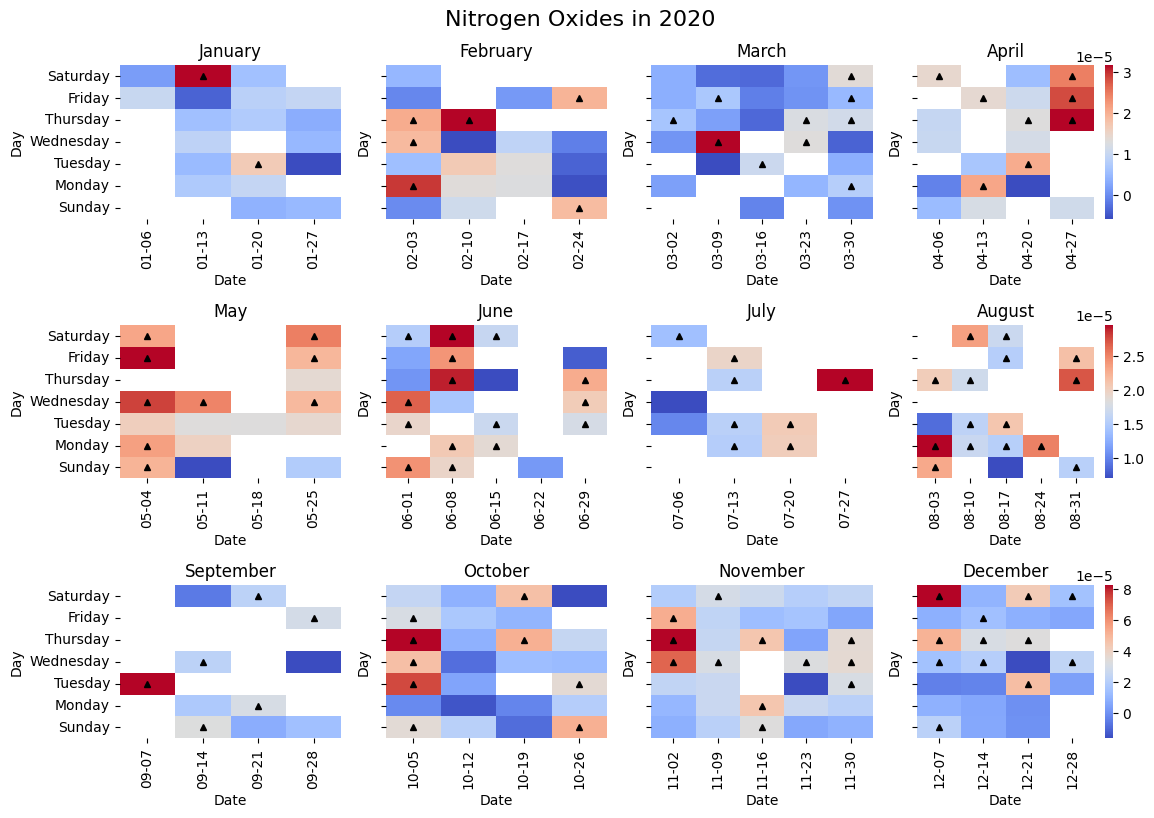

In [ ]:
#NO heatmaps 2020
A4_WIDTH = 11.7
A4_HEIGHT = 8.3

fig, axes = plt.subplots(3, 4, figsize=(A4_WIDTH, A4_HEIGHT))

months_2020 = pd.date_range(start='2020-01-01', end='2020-12-31', freq='MS')

for idx, month in enumerate(months_2020):
    start_date = month
    end_date = start_date + pd.offsets.MonthEnd(0)

    selected = fulldf_NO[(fulldf_NO['Date'] >= start_date) & (fulldf_NO['Date'] <= end_date)]
    selected = selected.sort_values(by='Date', ascending=True)
    selected['Date'] = selected['Date'].astype(str)

    pivoted = selected.pivot_table(index="Day", columns="Date", values="Mean NO Concentration")
    row_order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
    row_order = row_order[::-1]
    pivoted = pivoted.reindex(row_order)

    mean_NO_2020 = meanNO2020.getInfo()

    row_idx = idx // 4
    col_idx = idx % 4
    ax = axes[row_idx, col_idx]
    sns.heatmap(pivoted, cmap="coolwarm", annot=False, ax=ax, cbar=col_idx == 3)

    if col_idx == 0:
        ax.set_yticklabels(row_order)
    else:
        ax.set_yticklabels([])

    ax.set_xticklabels([date[5:] for date in pivoted.columns])

    # Adding a triangle marker to the cell if NO concentration exceeds the mean NO value for 2020
    for i in range(len(pivoted.index)):
        for j in range(len(pivoted.columns)):
            value = pivoted.iloc[i, j]
            if value > mean_NO_2020:
                ax.plot(j + 0.5, i + 0.5, marker='^', color='black', markersize=5)

    ax.set_title(start_date.strftime("%B"))

plt.suptitle("Nitrogen Oxides in 2020", fontsize=16)

plt.tight_layout()
plt.savefig(drive_folder_path + 'combined_heatmaps_NO_2020.png', dpi=300)  # Adjust dpi as needed

plt.show()


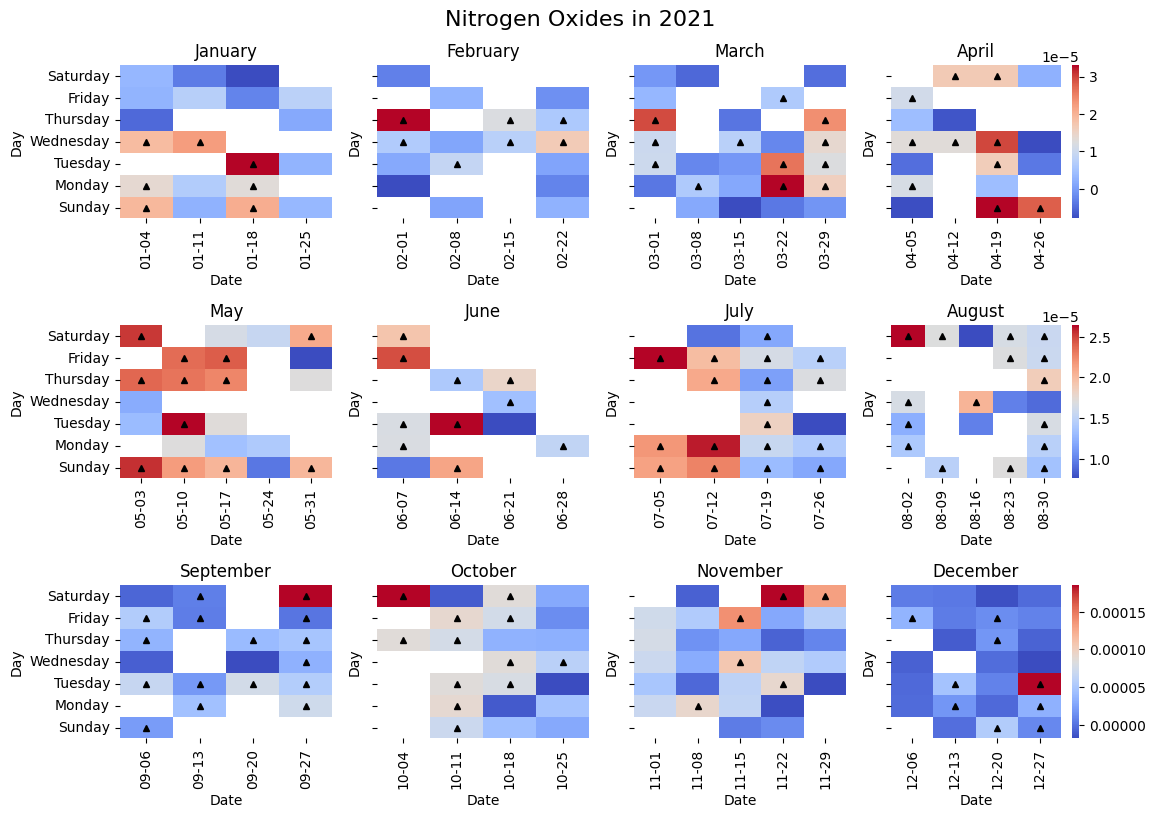

In [ ]:
#NO heatmaps 2021
A4_WIDTH = 11.7
A4_HEIGHT = 8.3

fig, axes = plt.subplots(3, 4, figsize=(A4_WIDTH, A4_HEIGHT))

months_2021 = pd.date_range(start='2021-01-01', end='2021-12-31', freq='MS')

for idx, month in enumerate(months_2021):
    start_date = month
    end_date = start_date + pd.offsets.MonthEnd(0)

    selected = fulldf_NO[(fulldf_NO['Date'] >= start_date) & (fulldf_NO['Date'] <= end_date)]
    selected = selected.sort_values(by='Date', ascending=True)
    selected['Date'] = selected['Date'].astype(str)

    pivoted = selected.pivot_table(index="Day", columns="Date", values="Mean NO Concentration")
    row_order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
    row_order = row_order[::-1]
    pivoted = pivoted.reindex(row_order)

    mean_NO_2021 = meanNO2021.getInfo()

    row_idx = idx // 4
    col_idx = idx % 4
    ax = axes[row_idx, col_idx]
    sns.heatmap(pivoted, cmap="coolwarm", annot=False, ax=ax, cbar=col_idx == 3)

    if col_idx == 0:
        ax.set_yticklabels(row_order)
    else:
        ax.set_yticklabels([])

    ax.set_xticklabels([date[5:] for date in pivoted.columns])

    # Adding a triangle marker to the cell if NO concentration exceeds the mean NO value for 2021
    for i in range(len(pivoted.index)):
        for j in range(len(pivoted.columns)):
            value = pivoted.iloc[i, j]
            if value > mean_NO_2021:
                ax.plot(j + 0.5, i + 0.5, marker='^', color='black', markersize=5)

    ax.set_title(start_date.strftime("%B"))

plt.suptitle("Nitrogen Oxides in 2021", fontsize=16)

plt.tight_layout()
plt.savefig(drive_folder_path + 'combined_heatmaps_NO_2021.png', dpi=300)  # Adjust dpi as needed

plt.show()


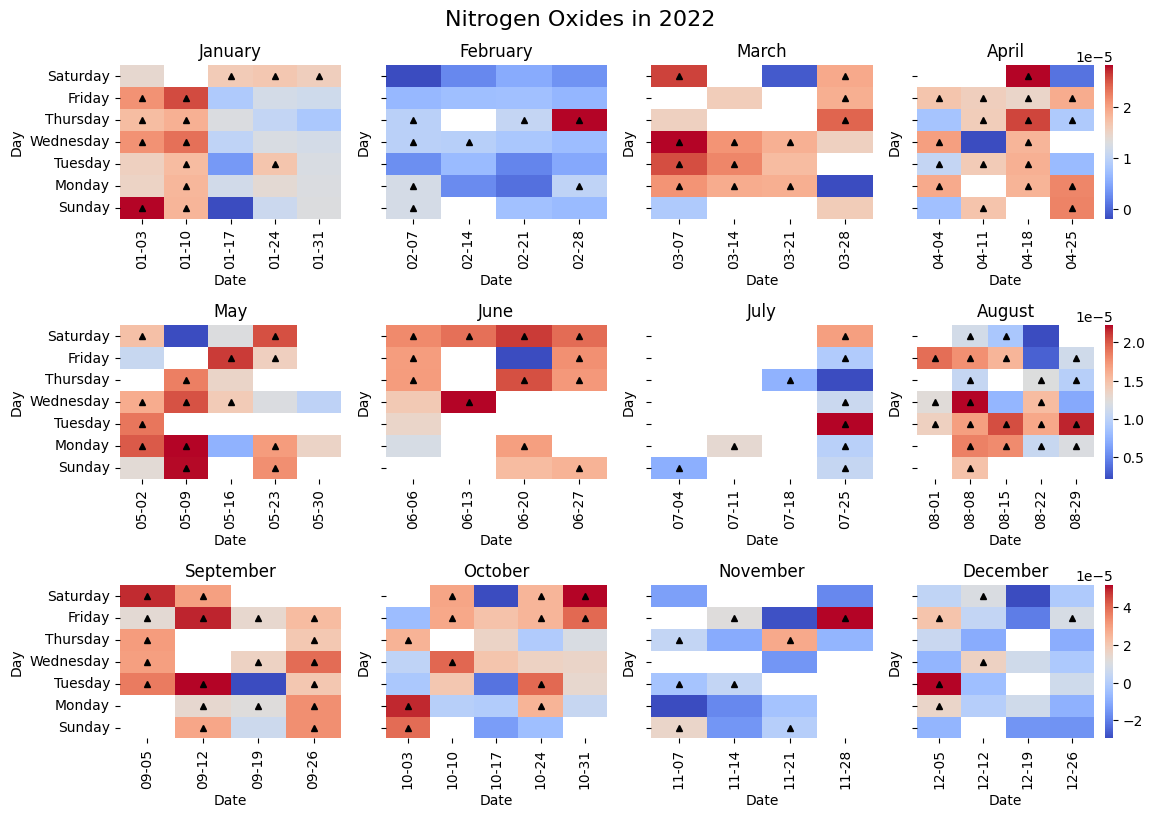

In [ ]:
#NO heatmaps 2022
A4_WIDTH = 11.7
A4_HEIGHT = 8.3

fig, axes = plt.subplots(3, 4, figsize=(A4_WIDTH, A4_HEIGHT))

months_2022 = pd.date_range(start='2022-01-01', end='2022-12-31', freq='MS')

for idx, month in enumerate(months_2022):
    start_date = month
    end_date = start_date + pd.offsets.MonthEnd(0)

    selected = fulldf_NO[(fulldf_NO['Date'] >= start_date) & (fulldf_NO['Date'] <= end_date)]
    selected = selected.sort_values(by='Date', ascending=True)
    selected['Date'] = selected['Date'].astype(str)

    pivoted = selected.pivot_table(index="Day", columns="Date", values="Mean NO Concentration")
    row_order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
    row_order = row_order[::-1]
    pivoted = pivoted.reindex(row_order)

    mean_NO_2022 = meanNO2022.getInfo()

    row_idx = idx // 4
    col_idx = idx % 4
    ax = axes[row_idx, col_idx]
    sns.heatmap(pivoted, cmap="coolwarm", annot=False, ax=ax, cbar=col_idx == 3)

    if col_idx == 0:
        ax.set_yticklabels(row_order)
    else:
        ax.set_yticklabels([])

    ax.set_xticklabels([date[5:] for date in pivoted.columns])

    # Adding a triangle marker to the cell if NO concentration exceeds the mean NO value for 2022
    for i in range(len(pivoted.index)):
        for j in range(len(pivoted.columns)):
            value = pivoted.iloc[i, j]
            if value > mean_NO_2022:
                ax.plot(j + 0.5, i + 0.5, marker='^', color='black', markersize=5)

    ax.set_title(start_date.strftime("%B"))

plt.suptitle("Nitrogen Oxides in 2022", fontsize=16)

plt.tight_layout()
plt.savefig(drive_folder_path + 'combined_heatmaps_NO_2022.png', dpi=300)  # Adjust dpi as needed

plt.show()


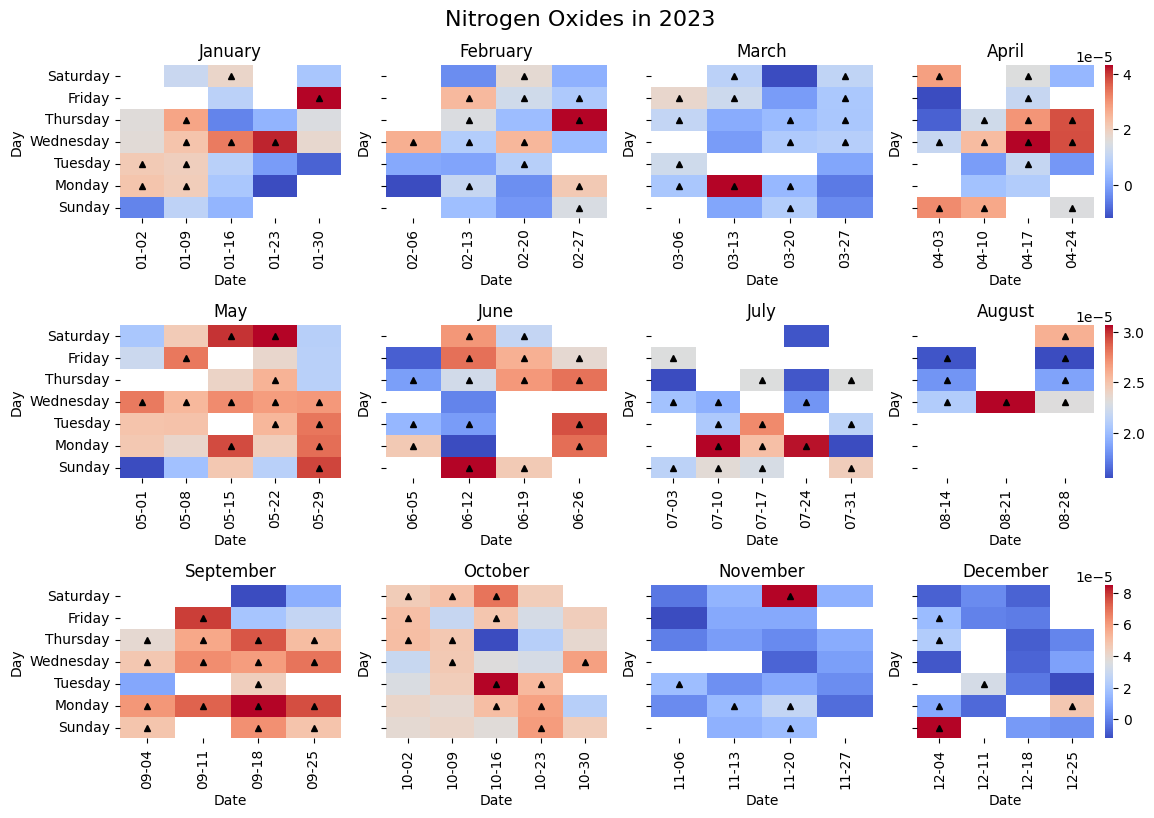

In [ ]:
#NO heatmaps 2023
A4_WIDTH = 11.7
A4_HEIGHT = 8.3

fig, axes = plt.subplots(3, 4, figsize=(A4_WIDTH, A4_HEIGHT))

months_2023 = pd.date_range(start='2023-01-01', end='2023-12-31', freq='MS')

for idx, month in enumerate(months_2023):
    start_date = month
    end_date = start_date + pd.offsets.MonthEnd(0)

    selected = fulldf_NO[(fulldf_NO['Date'] >= start_date) & (fulldf_NO['Date'] <= end_date)]
    selected = selected.sort_values(by='Date', ascending=True)
    selected['Date'] = selected['Date'].astype(str)

    pivoted = selected.pivot_table(index="Day", columns="Date", values="Mean NO Concentration")
    row_order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
    row_order = row_order[::-1]
    pivoted = pivoted.reindex(row_order)

    mean_NO_2023 = meanNO2023.getInfo()

    row_idx = idx // 4
    col_idx = idx % 4
    ax = axes[row_idx, col_idx]
    sns.heatmap(pivoted, cmap="coolwarm", annot=False, ax=ax, cbar=col_idx == 3)

    if col_idx == 0:
        ax.set_yticklabels(row_order)
    else:
        ax.set_yticklabels([])

    ax.set_xticklabels([date[5:] for date in pivoted.columns])

    # Adding a triangle marker to the cell if NO concentration exceeds the mean NO value for 2023
    for i in range(len(pivoted.index)):
        for j in range(len(pivoted.columns)):
            value = pivoted.iloc[i, j]
            if value > mean_NO_2023:
                ax.plot(j + 0.5, i + 0.5, marker='^', color='black', markersize=5)

    ax.set_title(start_date.strftime("%B"))

plt.suptitle("Nitrogen Oxides in 2023", fontsize=16)

plt.tight_layout()
plt.savefig(drive_folder_path + 'combined_heatmaps_NO_2023.png', dpi=300)  # Adjust dpi as needed

plt.show()


# SO

In [ ]:
#SO for KyoHwaSo
SO = ee.ImageCollection("COPERNICUS/S5P/OFFL/L3_SO2")
SO18to23= SO.filterBounds(KyoHwaSo).filterDate("2018-01-01", "2023-12-31")

SO2019 = SO.filterBounds(KyoHwaSo).filterDate("2019-01-01", "2019-12-31")
SO2020 = SO.filterBounds(KyoHwaSo).filterDate("2020-01-01", "2020-12-31")
SO2021 = SO.filterBounds(KyoHwaSo).filterDate("2021-01-01", "2021-12-31")
SO2022 = SO.filterBounds(KyoHwaSo).filterDate("2022-01-01", "2022-12-31")
SO2023 = SO.filterBounds(KyoHwaSo).filterDate("2023-01-01", "2023-12-31")

In [ ]:
#yearly mean SO
mean_SO2019 = SO2019.mean().reduceRegion(reducer=ee.Reducer.mean(), geometry=KyoHwaSo, scale=100)
meanSO2019 = mean_SO2019.get('SO2_column_number_density')
mean_SO2020 = SO2020.mean().reduceRegion(reducer=ee.Reducer.mean(), geometry=KyoHwaSo, scale=100)
meanSO2020 = mean_SO2020.get('SO2_column_number_density')
mean_SO2021 = SO2021.mean().reduceRegion(reducer=ee.Reducer.mean(), geometry=KyoHwaSo, scale=100)
meanSO2021 = mean_SO2021.get('SO2_column_number_density')
mean_SO2022 = SO2022.mean().reduceRegion(reducer=ee.Reducer.mean(), geometry=KyoHwaSo, scale=100)
meanSO2022 = mean_SO2022.get('SO2_column_number_density')
mean_SO2023 = SO2023.mean().reduceRegion(reducer=ee.Reducer.mean(), geometry=KyoHwaSo, scale=100)
meanSO2023 = mean_SO2023.get('SO2_column_number_density')

In [ ]:
#table of yearly means
data = [
    ['2019', meanSO2019.getInfo()],
    ['2020', meanSO2020.getInfo()],
    ['2021', meanSO2021.getInfo()],
    ['2022', meanSO2022.getInfo()],
    ['2023', meanSO2023.getInfo()]
]

print(tabulate(data, headers=['Year', 'SO (mol/m2)']))

  Year    SO (mol/m2)
------  -------------
  2019    0.000260936
  2020    0.000209365
  2021    0.000344825
  2022    0.000382324
  2023    0.000265274


In [ ]:
#computed SO min
def computeSOmin(img):
    date = ee.Date(img.get('system:time_start'))
    SO = img.select('SO2_column_number_density')
    min_SO = SO.reduceRegion(reducer=ee.Reducer.min(), geometry=KyoHwaSo, scale=100)
    return ee.Feature(None, {'date': date.format('YYYY-MM-dd'), 'min_SO': min_SO})

#computed SO mean
def computeSOMean(img):
    date = ee.Date(img.get('system:time_start'))
    SO = img.select('SO2_column_number_density')
    mean_SO = SO.reduceRegion(reducer=ee.Reducer.mean(), geometry=KyoHwaSo, scale=100)
    return ee.Feature(None, {'date': date.format('YYYY-MM-dd'), 'mean_SO': mean_SO})

#computed SO max
def computeSOmax(img):
    date = ee.Date(img.get('system:time_start'))
    SO = img.select('SO2_column_number_density')
    max_SO = SO.reduceRegion(reducer=ee.Reducer.max(), geometry=KyoHwaSo, scale=100)
    return ee.Feature(None, {'date': date.format('YYYY-MM-dd'), 'max_SO': max_SO})

In [ ]:
#min - map for year 2018-2023
min_daily_average_SO = SO18to23.map(computeSOmin)

min_results_SO = min_daily_average_SO.aggregate_array('min_SO')
dates_min_SO = min_daily_average_SO.aggregate_array('date')

min_SO_values = min_results_SO.getInfo()
dates_min_SO_list = dates_min_SO.getInfo()

#change to datetime obj
datetime_dates_min_SO = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates_min_SO_list]

#combine dates_min_SO with SO average
min_combined_data_SO = [{'date': date, 'min_SO': min_SO} for date, min_SO in zip(dates_min_SO_list, min_SO_values)]

cNames = ['Year', 'Date', 'Min SO concentration', 'Mean SO Concentration', 'Max SO Concentration', 'Mean Rainfall']

days = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]
numbers = [0,1,2,3,4,5,6]
fulldf_SO = pd.DataFrame(columns=cNames)

for i in range(len(numbers)):
  print(numbers[i])
  print(days[i])
  min_monday_data_SO = [item for item, date in zip(min_combined_data_SO, datetime_dates_min_SO) if date.weekday() == numbers[i]]


#combine data with avg SO
  min_filteredmondata_SO = [item for item in min_monday_data_SO if item['min_SO']['SO2_column_number_density'] is not None]

#mean - map for year 2018-2023
  mean_daily_average_SO = SO18to23.map(computeSOMean)

  mean_results_SO = mean_daily_average_SO.aggregate_array('mean_SO')
  dates_mean_SO = mean_daily_average_SO.aggregate_array('date')

  mean_SO_values = mean_results_SO.getInfo()
  dates_mean_SO_list = dates_mean_SO.getInfo()
  datetime_dates_mean_SO = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates_mean_SO_list]
  mean_combined_data_SO = [{'date': date, 'mean_SO': mean_SO} for date, mean_SO in zip(dates_mean_SO_list, mean_SO_values)]
  mean_monday_data_SO = [item for item, date in zip(mean_combined_data_SO, datetime_dates_mean_SO) if date.weekday() == numbers[i]]

  mean_filteredmondata_SO = [item for item in mean_monday_data_SO if item['mean_SO']['SO2_column_number_density'] is not None]

  #max - map for year 2018-2023
  max_daily_average_SO = SO18to23.map(computeSOmax)

  max_results_SO = max_daily_average_SO.aggregate_array('max_SO')
  dates_max = max_daily_average_SO.aggregate_array('date')

  max_SO_values = max_results_SO.getInfo()
  dates_max_list_SO = dates_max.getInfo()
  datetime_dates_max = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates_max_list_SO]
  max_combined_data_SO = [{'date': date, 'max_SO': max_SO} for date, max_SO in zip(dates_max_list_SO, max_SO_values)]
  max_monday_data_SO = [item for item, date in zip(max_combined_data_SO, datetime_dates_max) if date.weekday() == numbers[i]]

  max_filteredmondata_SO = [item for item in max_monday_data_SO if item['max_SO']['SO2_column_number_density'] is not None]

  #list has more than one value for dates - calculating average
  from collections import defaultdict

  daily_min_dict_SO = defaultdict(list)

  # Populating dictionary with min SO values
  for item in min_filteredmondata_SO:
      date = item['date']
      min_SO = item['min_SO']['SO2_column_number_density']
      daily_min_dict_SO[date].append(min_SO)

  # average min SO for each day
  daily_min_SO = [{'date': date, 'min_SO': sum(values) / len(values)} for date, values in daily_min_dict_SO.items()]

  #Mean

  daily_mean_dict_SO = defaultdict(list)

  for item in mean_filteredmondata_SO:
      date = item['date']
      mean_SO = item['mean_SO']['SO2_column_number_density']
      daily_mean_dict_SO[date].append(mean_SO)

  #Max
  daily_max_dict_SO = defaultdict(list)

  for item in max_filteredmondata_SO:
      date = item['date']
      max_SO = item['max_SO']['SO2_column_number_density']
      daily_max_dict_SO[date].append(max_SO)

  daily_mean_dict_rain = defaultdict(list)

  # average min SO for each day
  daily_min_SO = [{'date': date, 'min_SO': sum(values) / len(values)} for date, values in daily_min_dict_SO.items()]
  daily_mean_SO = [{'date': date, 'mean_SO': sum(values) / len(values)} for date, values in daily_mean_dict_SO.items()]
  daily_max_SO = [{'date': date, 'max_SO': sum(values) / len(values)} for date, values in daily_max_dict_SO.items()]
  # Combined into a single DataFrame
  df_min_SO = pd.DataFrame(daily_min_SO)
  df_mean_SO = pd.DataFrame(daily_mean_SO)
  df_max_SO = pd.DataFrame(daily_max_SO)

  # Merge dataframes on date
  df_combined_SO = df_min_SO.merge(df_mean_SO, on='date').merge(df_max_SO, on='date')

  # Convert date column to datetime type
  df_combined_SO['date'] = pd.to_datetime(df_combined_SO['date'])

  # Extract year and weekday from the date
  df_combined_SO['Year'] = df_combined_SO['date'].dt.year
  df_combined_SO['Monday'] = df_combined_SO['date'] - pd.to_timedelta(df_combined_SO['date'].dt.dayofweek, unit='D')
  df_combined_SO.drop(columns=['date'], inplace=True)

  # Reset index to start from 0
  df_combined_SO.reset_index(drop=True, inplace=True)

  # Reorder and rename columns
  df_combined_SO = df_combined_SO[['Year', 'Monday', 'min_SO', 'mean_SO', 'max_SO']]

  df_combined_SO.columns = ['Year', 'Date', 'Min SO Concentration', 'Mean SO Concentration', 'Max SO Concentration']
  df_combined_SO["Day"] = days[i]


  print(df_combined_SO.head())
  fulldf_SO = pd.concat([fulldf_SO, df_combined_SO],ignore_index=True)


0
Sunday
   Year       Date  Min SO Concentration  Mean SO Concentration  \
0  2019 2019-02-04             -0.000984               0.000494   
1  2019 2019-02-11             -0.000905               0.000894   
2  2019 2019-02-18             -0.000905               0.000498   
3  2019 2019-02-25             -0.000998               0.000010   
4  2019 2019-03-04             -0.000724               0.000209   

   Max SO Concentration     Day  
0              0.002776  Sunday  
1              0.003444  Sunday  
2              0.002824  Sunday  
3              0.001725  Sunday  
4              0.001463  Sunday  
1
Monday
   Year       Date  Min SO Concentration  Mean SO Concentration  \
0  2019 2019-02-04             -0.000928               0.000226   
1  2019 2019-02-11             -0.000862               0.000459   
2  2019 2019-02-25             -0.000859               0.001203   
3  2019 2019-03-04              0.000156               0.000529   
4  2019 2019-03-11             -0.000774

In [ ]:
fulldf_SO.to_csv(os.path.join(drive_directory, 'SO_full.csv'), index=False)

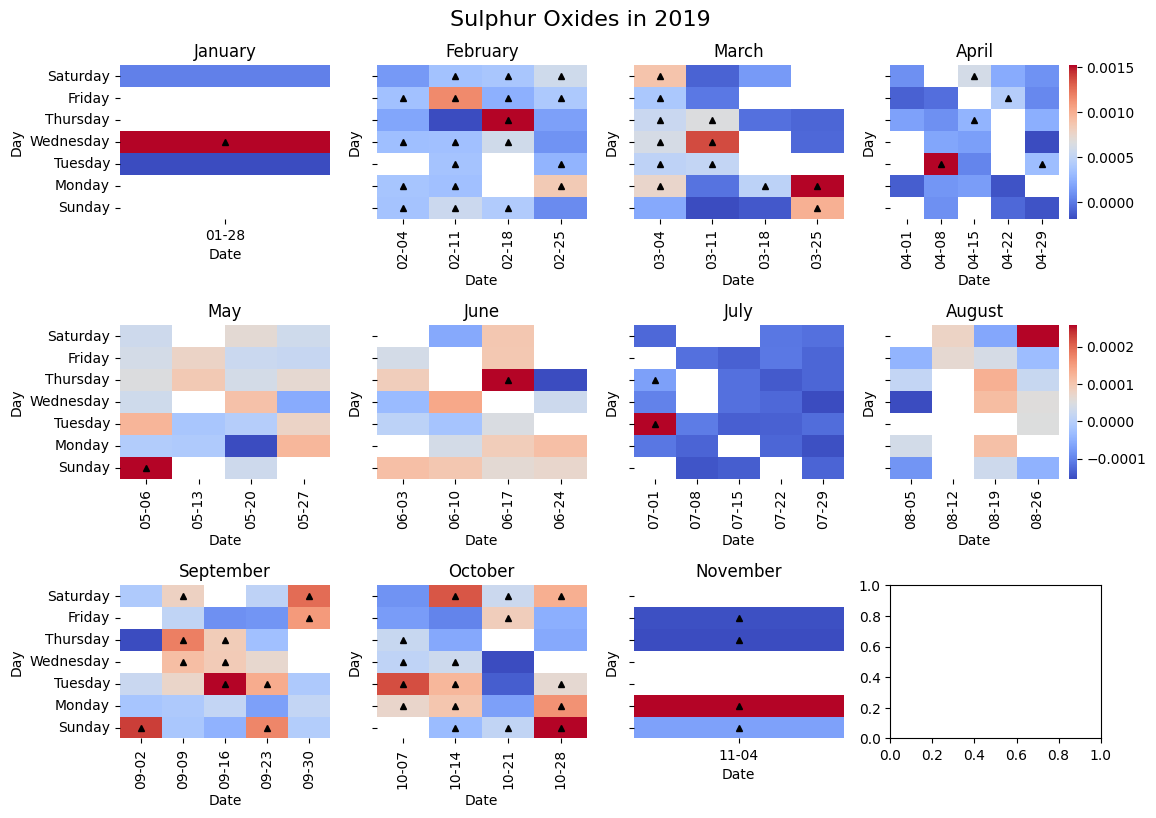

In [ ]:
#SO heatmaps 2019
A4_WIDTH = 11.7
A4_HEIGHT = 8.3

fig, axes = plt.subplots(3, 4, figsize=(A4_WIDTH, A4_HEIGHT))

months_2019 = pd.date_range(start='2019-01-01', end='2019-12-31', freq='MS')

for idx, month in enumerate(months_2019):
    start_date = month
    end_date = start_date + pd.offsets.MonthEnd(0)

    selected = fulldf_SO[(fulldf_SO['Date'] >= start_date) & (fulldf_SO['Date'] <= end_date)]
    selected = selected.sort_values(by='Date', ascending=True)
    selected['Date'] = selected['Date'].astype(str)

    pivoted = selected.pivot_table(index="Day", columns="Date", values="Mean SO Concentration")

    if pivoted.empty:
        continue
    row_order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
    row_order = row_order[::-1]
    pivoted = pivoted.reindex(row_order)

    mean_SO_2019 = meanSO2019.getInfo()

    row_idx = idx // 4
    col_idx = idx % 4
    ax = axes[row_idx, col_idx]
    sns.heatmap(pivoted, cmap="coolwarm", annot=False, ax=ax, cbar=col_idx == 3)

    if col_idx == 0:
        ax.set_yticklabels(row_order)
    else:
        ax.set_yticklabels([])

    ax.set_xticklabels([date[5:] for date in pivoted.columns])

    # Add a triangle marker to the cell if SO concentration exceeds the mean SO value
    for i in range(len(pivoted.index)):
        for j in range(len(pivoted.columns)):
            value = pivoted.iloc[i, j]
            if value > mean_SO_2019:
                ax.plot(j + 0.5, i + 0.5, marker='^', color='black', markersize=5)

    ax.set_title(start_date.strftime("%B"))

plt.suptitle("Sulphur Oxides in 2019", fontsize=16)

plt.tight_layout()
plt.savefig(drive_folder_path + 'combined_heatmaps_SO_2019.png', dpi=300)  # Adjust dpi as needed

plt.show()


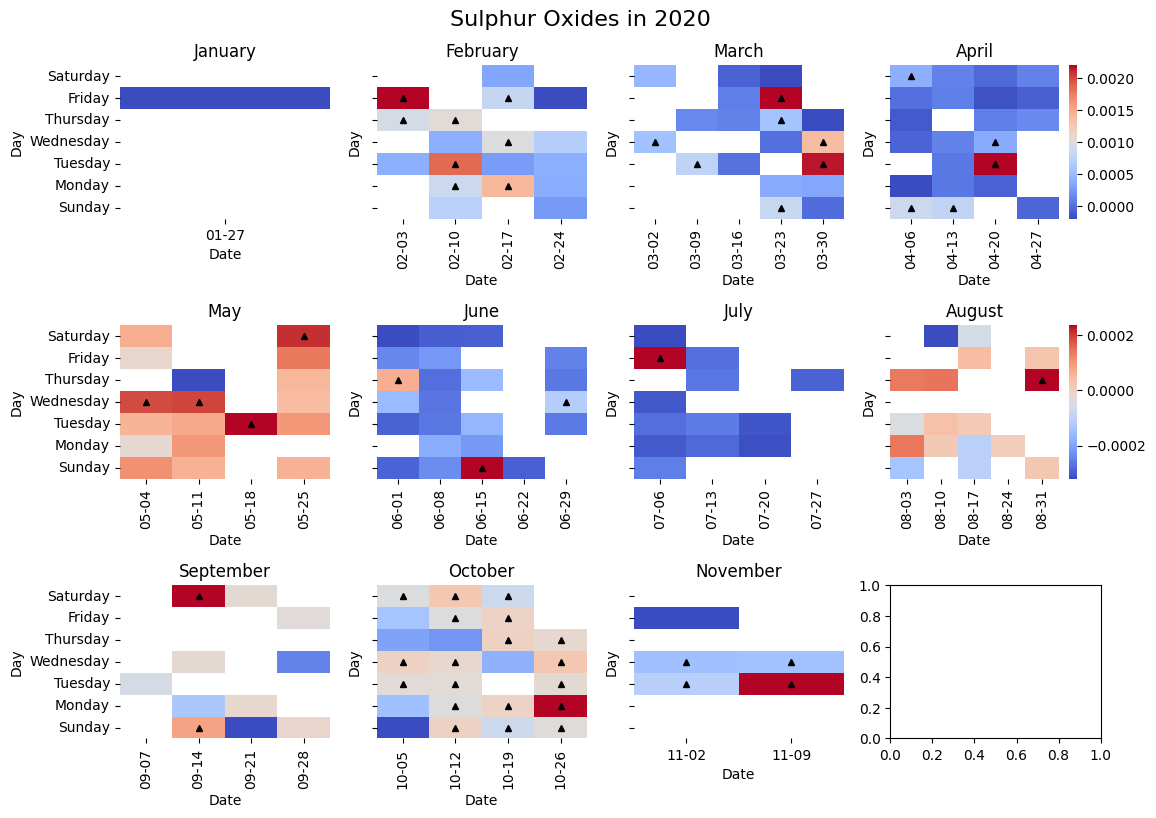

In [ ]:
#SO heatmaps 2020
A4_WIDTH = 11.7
A4_HEIGHT = 8.3

fig, axes = plt.subplots(3, 4, figsize=(A4_WIDTH, A4_HEIGHT))

months_2020 = pd.date_range(start='2020-01-01', end='2020-12-31', freq='MS')

for idx, month in enumerate(months_2020):
    start_date = month
    end_date = start_date + pd.offsets.MonthEnd(0)

    selected = fulldf_SO[(fulldf_SO['Date'] >= start_date) & (fulldf_SO['Date'] <= end_date)]
    selected = selected.sort_values(by='Date', ascending=True)
    selected['Date'] = selected['Date'].astype(str)

    pivoted = selected.pivot_table(index="Day", columns="Date", values="Mean SO Concentration")

    if pivoted.empty:
        continue
    row_order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
    row_order = row_order[::-1]
    pivoted = pivoted.reindex(row_order)

    mean_SO_2020 = meanSO2020.getInfo()

    row_idx = idx // 4
    col_idx = idx % 4
    ax = axes[row_idx, col_idx]
    sns.heatmap(pivoted, cmap="coolwarm", annot=False, ax=ax, cbar=col_idx == 3)

    if col_idx == 0:
        ax.set_yticklabels(row_order)
    else:
        ax.set_yticklabels([])

    ax.set_xticklabels([date[5:] for date in pivoted.columns])

    # Add a triangle marker to the cell if SO concentration exceeds the mean SO value
    for i in range(len(pivoted.index)):
        for j in range(len(pivoted.columns)):
            value = pivoted.iloc[i, j]
            if value > mean_SO_2020:
                ax.plot(j + 0.5, i + 0.5, marker='^', color='black', markersize=5)

    ax.set_title(start_date.strftime("%B"))

plt.suptitle("Sulphur Oxides in 2020", fontsize=16)

plt.tight_layout()
plt.savefig(drive_folder_path + 'combined_heatmaps_SO_2020.png', dpi=300)  # Adjust dpi as needed

plt.show()


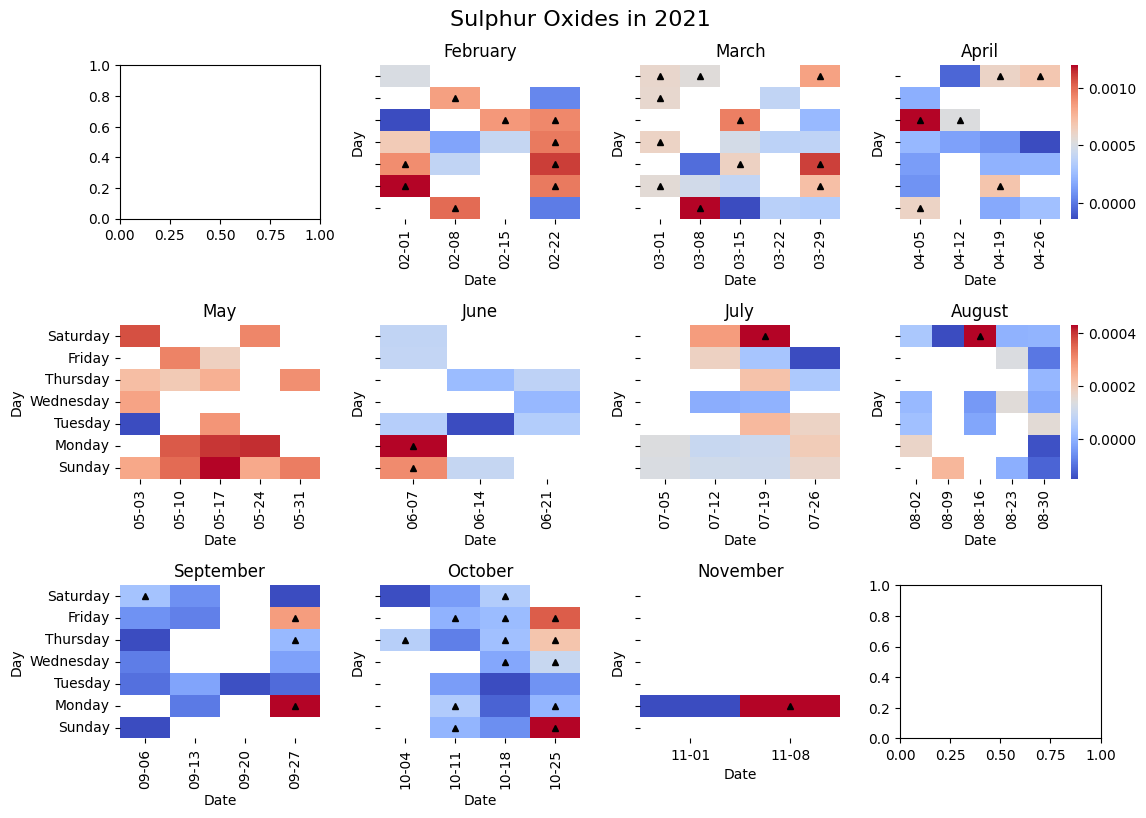

In [ ]:
#SO heatmaps 2021
A4_WIDTH = 11.7
A4_HEIGHT = 8.3

fig, axes = plt.subplots(3, 4, figsize=(A4_WIDTH, A4_HEIGHT))

months_2021 = pd.date_range(start='2021-01-01', end='2021-12-31', freq='MS')

for idx, month in enumerate(months_2021):
    start_date = month
    end_date = start_date + pd.offsets.MonthEnd(0)

    selected = fulldf_SO[(fulldf_SO['Date'] >= start_date) & (fulldf_SO['Date'] <= end_date)]
    selected = selected.sort_values(by='Date', ascending=True)
    selected['Date'] = selected['Date'].astype(str)

    pivoted = selected.pivot_table(index="Day", columns="Date", values="Mean SO Concentration")

    if pivoted.empty:
        continue
    row_order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
    row_order = row_order[::-1]
    pivoted = pivoted.reindex(row_order)

    mean_SO_2021 = meanSO2021.getInfo()

    row_idx = idx // 4
    col_idx = idx % 4
    ax = axes[row_idx, col_idx]
    sns.heatmap(pivoted, cmap="coolwarm", annot=False, ax=ax, cbar=col_idx == 3)

    if col_idx == 0:
        ax.set_yticklabels(row_order)
    else:
        ax.set_yticklabels([])

    ax.set_xticklabels([date[5:] for date in pivoted.columns])

    # Add a triangle marker to the cell if SO concentration exceeds the mean SO value
    for i in range(len(pivoted.index)):
        for j in range(len(pivoted.columns)):
            value = pivoted.iloc[i, j]
            if value > mean_SO_2021:
                ax.plot(j + 0.5, i + 0.5, marker='^', color='black', markersize=5)

    ax.set_title(start_date.strftime("%B"))

plt.suptitle("Sulphur Oxides in 2021", fontsize=16)

plt.tight_layout()
plt.savefig(drive_folder_path + 'combined_heatmaps_SO_2021.png', dpi=300)  # Adjust dpi as needed

plt.show()


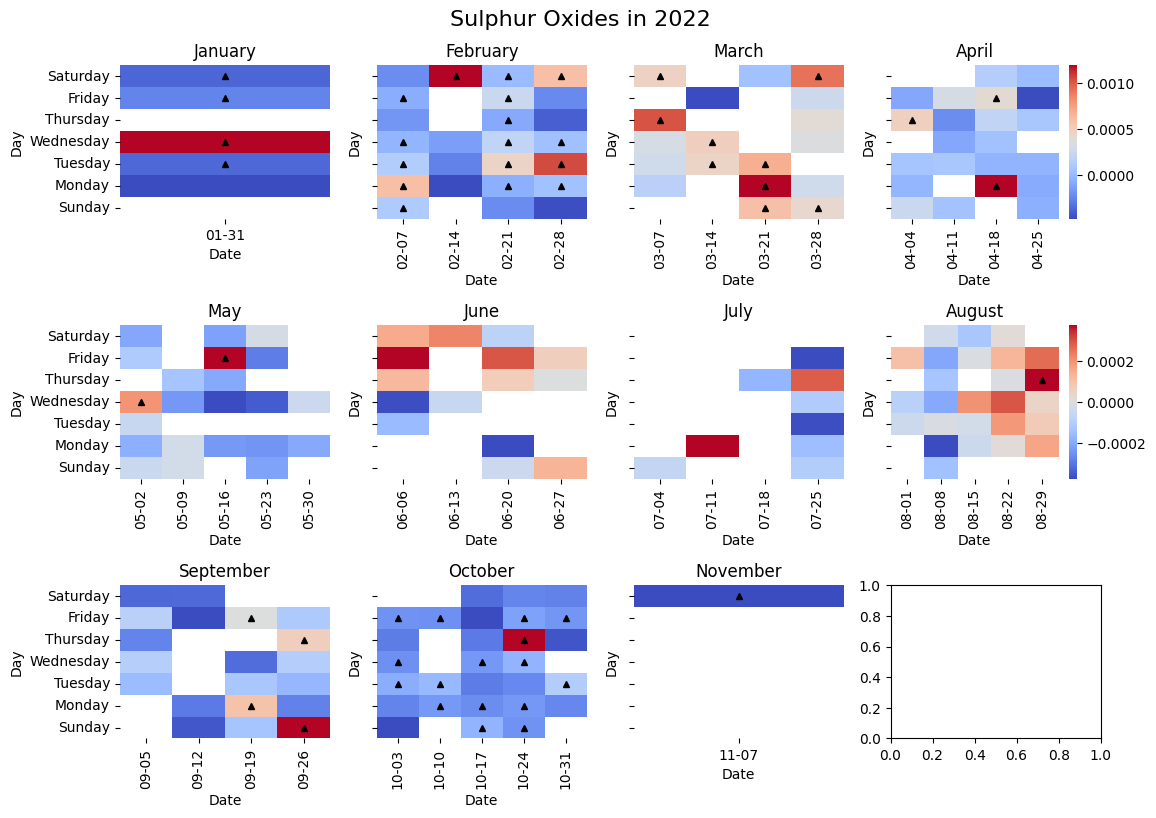

In [ ]:
#SO heatmaps 2022
A4_WIDTH = 11.7
A4_HEIGHT = 8.3

fig, axes = plt.subplots(3, 4, figsize=(A4_WIDTH, A4_HEIGHT))

months_2022 = pd.date_range(start='2022-01-01', end='2022-12-31', freq='MS')

for idx, month in enumerate(months_2022):
    start_date = month
    end_date = start_date + pd.offsets.MonthEnd(0)

    selected = fulldf_SO[(fulldf_SO['Date'] >= start_date) & (fulldf_SO['Date'] <= end_date)]
    selected = selected.sort_values(by='Date', ascending=True)
    selected['Date'] = selected['Date'].astype(str)

    pivoted = selected.pivot_table(index="Day", columns="Date", values="Mean SO Concentration")

    if pivoted.empty:
        continue
    row_order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
    row_order = row_order[::-1]
    pivoted = pivoted.reindex(row_order)

    mean_SO_2022 = meanSO2022.getInfo()

    row_idx = idx // 4
    col_idx = idx % 4
    ax = axes[row_idx, col_idx]
    sns.heatmap(pivoted, cmap="coolwarm", annot=False, ax=ax, cbar=col_idx == 3)

    if col_idx == 0:
        ax.set_yticklabels(row_order)
    else:
        ax.set_yticklabels([])

    ax.set_xticklabels([date[5:] for date in pivoted.columns])

    # Add a triangle marker to the cell if SO concentration exceeds the mean SO value
    for i in range(len(pivoted.index)):
        for j in range(len(pivoted.columns)):
            value = pivoted.iloc[i, j]
            if value > mean_SO_2022:
                ax.plot(j + 0.5, i + 0.5, marker='^', color='black', markersize=5)

    ax.set_title(start_date.strftime("%B"))

plt.suptitle("Sulphur Oxides in 2022", fontsize=16)

plt.tight_layout()
plt.savefig(drive_folder_path + 'combined_heatmaps_SO_2022.png', dpi=300)  # Adjust dpi as needed

plt.show()


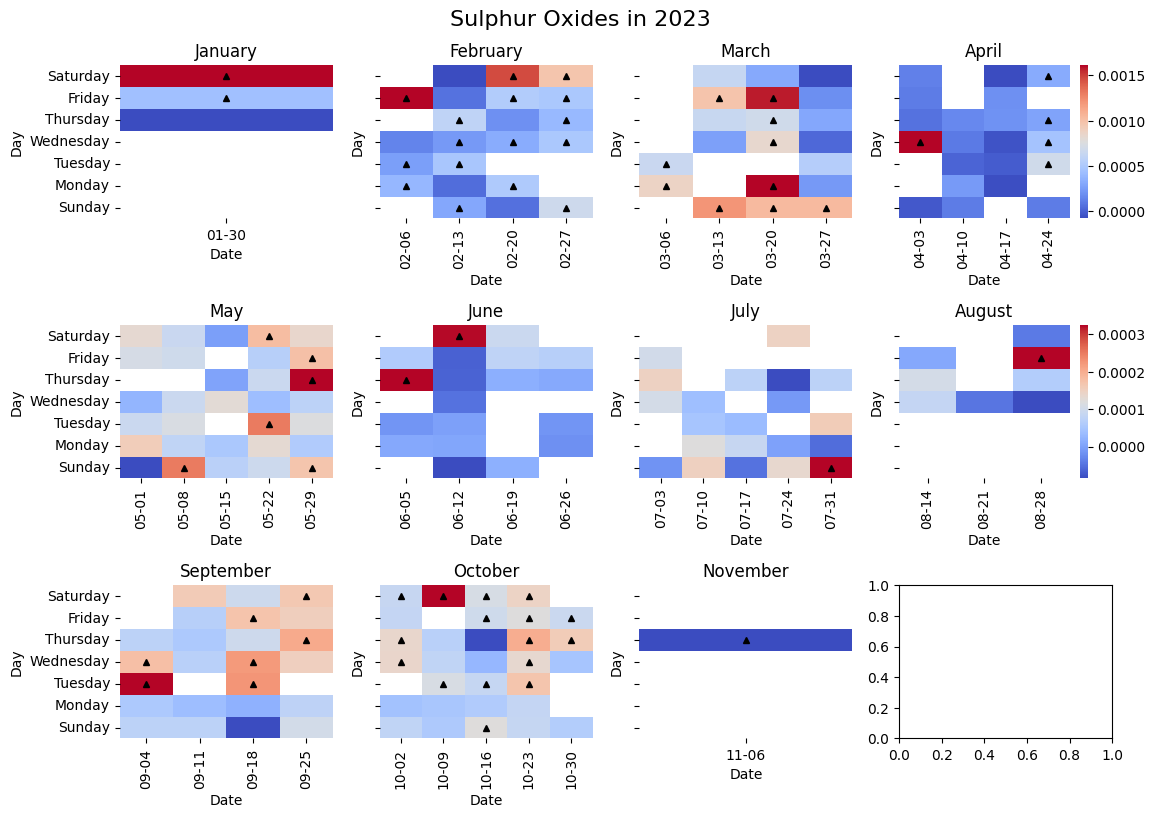

In [ ]:
#SO heatmaps 2023
A4_WIDTH = 11.7
A4_HEIGHT = 8.3

fig, axes = plt.subplots(3, 4, figsize=(A4_WIDTH, A4_HEIGHT))

months_2023 = pd.date_range(start='2023-01-01', end='2023-12-31', freq='MS')

for idx, month in enumerate(months_2023):
    start_date = month
    end_date = start_date + pd.offsets.MonthEnd(0)

    selected = fulldf_SO[(fulldf_SO['Date'] >= start_date) & (fulldf_SO['Date'] <= end_date)]
    selected = selected.sort_values(by='Date', ascending=True)
    selected['Date'] = selected['Date'].astype(str)

    pivoted = selected.pivot_table(index="Day", columns="Date", values="Mean SO Concentration")

    if pivoted.empty:
        continue
    row_order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
    row_order = row_order[::-1]
    pivoted = pivoted.reindex(row_order)

    mean_SO_2023 = meanSO2023.getInfo()

    row_idx = idx // 4
    col_idx = idx % 4
    ax = axes[row_idx, col_idx]
    sns.heatmap(pivoted, cmap="coolwarm", annot=False, ax=ax, cbar=col_idx == 3)

    if col_idx == 0:
        ax.set_yticklabels(row_order)
    else:
        ax.set_yticklabels([])

    ax.set_xticklabels([date[5:] for date in pivoted.columns])

    # Add a triangle marker to the cell if SO concentration exceeds the mean SO value
    for i in range(len(pivoted.index)):
        for j in range(len(pivoted.columns)):
            value = pivoted.iloc[i, j]
            if value > mean_SO_2023:
                ax.plot(j + 0.5, i + 0.5, marker='^', color='black', markersize=5)

    ax.set_title(start_date.strftime("%B"))

plt.suptitle("Sulphur Oxides in 2023", fontsize=16)

plt.tight_layout()
plt.savefig(drive_folder_path + 'combined_heatmaps_SO_2023.png', dpi=300)  # Adjust dpi as needed

plt.show()
